# G18_Rossmann Store Sales

#### Presented by: Sing-yu Chen, Szu-yun Wen, Kavinadhithya ALAMALU MAHENDRAKUMAR, Vikramaditya THATIKONDA

https://www.kaggle.com/c/rossmann-store-sales
The objective of this project is to create the robust prediction model that accurately predicts the future sales of Rossmann's 1,115 stores located in Germany over a 6-week period.

## Basic process

1. Initialize the development environment.
2. Load the data.
3. Splice the data.
4. Data preprocessing.
5. Data mining.
6. Feature engineering.
7. Model construction, training, parameter adjustment, and integration to a point where it cannot be improved.

In [1]:
import time

import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

%matplotlib inline

1. Id: combination of (store, date) in the test set.
2. Store: Represents the unique ID of each store.
3. Sales: The sales volume on any day is also the field we want to predict.
4. Open: whether to open the door, 0=close the door, 1=open the door.
5. StateHoliday: National holiday, general holidays and national holidays will be closed, all schools will be closed on public holidays, a=public holiday, b=Eastern holiday, c=Christmas, 0=not a holiday.
6. StoreType: Store type, there are four types, abcd.
7. Assortment: classification level, a=basic, b=additional, c=expansion.
8. CompetitionDistance: Competitor distance.
9. CompetitionOpenSince\[Month/Year\]: Gives the opening time of the nearest competitor.
10. Promo: Indicates whether the store has a promotion that day?
11. Promo2: Indicates whether the store conducts ongoing promotional activities, 0=no parameter, 1=participation.
12. Promo2Since\[Year/Week\]: The year/week when the store starts continuous promotion.
13. PromoInterval: The interval between the start of continuous promotion activities

In [2]:
train_data = pd.read_csv('train.csv', low_memory=False)
test_data = pd.read_csv('test.csv', low_memory=False)
store_data = pd.read_csv('store.csv')

In [3]:
train_data.Date = pd.to_datetime(train_data.Date)
test_data.Date = pd.to_datetime(test_data.Date)

In [4]:
train_data.head(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [5]:
test_data.head(5)

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [6]:
store_data.head(20)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
7,8,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
8,9,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
9,10,a,a,3160.0,9.0,2009.0,0,NaN,NaN,NaN


Conclusion:

You can see that there is a Store field that is the same between train, test and store, which can be used to link the two tables.

Store, DayOfWeek, Date, Open, Promo, StateHolidy, and SchoolHoliday in train cannot be used directly because they are not numeric types.

Except COmpetitionDistance, none can be used directly in the store.

You can see that there are a large number of fields that are enumerated and time series. These fields must be processed, otherwise the prediction results will be affected.

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  int64         
 6   Promo          1017209 non-null  int64         
 7   StateHoliday   1017209 non-null  object        
 8   SchoolHoliday  1017209 non-null  int64         
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 69.8+ MB


There are a total of 1,017,209 pieces of data.  

All fields are complete and there are no null fields. This is good news. There is no need to handle abnormal data in the train part.

In [8]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             41088 non-null  int64         
 1   Store          41088 non-null  int64         
 2   DayOfWeek      41088 non-null  int64         
 3   Date           41088 non-null  datetime64[ns]
 4   Open           41077 non-null  float64       
 5   Promo          41088 non-null  int64         
 6   StateHoliday   41088 non-null  object        
 7   SchoolHoliday  41088 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 2.5+ MB


There are 11 NaNs in the Open field. This can be filled directly with 1, which means opening the door.

In [9]:
store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


For Store data, there are a total of 1115 pieces of data, corresponding to 1115 stores distributed in Germany, of which there are only 761 pieces of data for CompetitionOpenSinceMonth and CompetitionOpenSinceYear, which means that 354 stores do not have corresponding opening date fields for competitors, and Promo2SinceWeek , Promo2SinceYear, and PromoInterval are only 571, which means that nearly half of the stores have no continuous promotion activities, and there are still 3 stores that have no competitors.

In [10]:
store_data[store_data['CompetitionDistance'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


You can see that there are three stores that do not have CompetitionDistance. I don’t know if there are no competitors or something else. But since there are only 3, just fill it with the average value. I want to delete it, but considering that the store information needs to be linked to In train, the 3 pieces of data here correspond to 3\*N pieces in train, so they will not be deleted.

In [11]:
store_data[store_data['CompetitionOpenSinceMonth'].isnull()][:5]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
15,16,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN
18,19,a,c,3240.0,NaN,NaN,1,22.0,2011.0,"Mar,Jun,Sept,Dec"
21,22,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"


Seeing that for the data of CompetitionOpenSinceMonth and CompetitionOpenSinceYear, it is not that there are no competitors, but the opening date of the competitors is missing. At the same time, about 1/3 of the data is missing, which is not a lot. So let’s complete them later. The method uses the average value of this field from other data.

In [12]:
store_data[store_data['Promo2SinceWeek'].isnull()][:5]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN


For Promo2SinceWeek, Promo2SinceYear, and PromoInterval, they are not missing, but when Promo2 is 0, that is, there is no ongoing promotion activity, these three fields are all NaN. This is normal. We will consider how to deal with the Promo2 series later. Fields, after all, there are many missing, or the data can be divided into two parts according to whether there is Promo2, and training and prediction are performed respectively.

## Data Cleaning

### Open

In [13]:
test_data.fillna(1, inplace=True)

### CompetitionOpenSinceMonth, CompetitionOpenSinceYear, CompetitionDistance filling

Use the median fill of the data of the field that is not NaN, and be careful to round.

Actual testing found that taking 0 is better than taking the average, median, etc.

In [14]:
store_data.fillna(0, inplace=True)

## Data Merge

### Train, Store Merge

based on Store

In [15]:
train_all = pd.merge(train_data, store_data, on='Store')
train_all.head(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0


### Test, Store Merge

In [16]:
test_all = pd.merge(test_data, store_data, on='Store')
test_all.head(5)

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,857,1,3,2015-09-16,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1713,1,2,2015-09-15,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,2569,1,1,2015-09-14,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,3425,1,7,2015-09-13,0.0,0,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0


### Promo2

In [17]:
train_all[train_all['Promo2']==0][:3]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0


It can be seen that this part of the information is missing because it did not participate in promotional activities (Promo2==0).

## Divide the data set

The last 6 weeks of data are used as the validation datasets. The basis of this division is that the data is time series data, which helps to utilize the trend characteristics of time series data.

In [18]:
train = train_all.sort_values(['Date'],ascending = False)
ho_test = train[:6*7*1115]
ho_train = train[6*7*1115:]

Remove data that is not open and data with sales of 0

Data with a sales value of 0 are not included in the final score and are therefore removed from the training data to avoid interference with the model.

In [19]:
ho_test = ho_test[ho_test["Open"] != 0]
ho_test = ho_test[ho_test["Sales"] > 0]
ho_train = ho_train[ho_train["Open"] != 0]
ho_train = ho_train[ho_train["Sales"] > 0]

## Data mining: date information, promotion information, competitor information

## Date information: 
### Extract year, month, day, WeekOfYear (for Promo2SinceWeek), and whether it is a working day. For the time field, my earliest approach was to treat it as an enumeration. There are two problems in doing so:

The enumeration amount is large, which affects the effects of subsequent Xgboost. In fact, if the number of features is limited, Xgboost is not needed. After all, Xgboost sacrifices part of the data performance.
Training data and test data cannot be aligned after enumerating variable One-Hot.
No real digging into the date information.
The most important thing is that the time series field should have a great impact on prediction, because store sales should be seasonal and date specific, such as holidays, seasons, etc. Therefore, this part of the information can be mined through existing information as New features and then discarding the original more primitive information are more helpful to our model.

## Extract fields:

Year.
Quarter.
Month.
Day.
WeekOfYear.
IsWorkDay.

In [20]:
def get_datetime_info(data):
    '''
    data:dataFrame
    return year,quarter,month,day,weekOfYear,isWorkDay
    '''
    data['Year'] = data.Date.dt.year
    data['Month'] = data.Date.dt.month
    data['Day'] = data.Date.dt.day
    data['DayOfWeek'] = data.Date.dt.dayofweek
    data['WeekOfYear'] = data.Date.dt.weekofyear

#### Visually analyze the impact of time fields relative to sales

In [21]:
print('Average sales during school holidays=1：'+str(train_data[train_data['SchoolHoliday'] == 1].Sales.mean()))
print('Average sales during school holidays=0：'+str(train_data[train_data['SchoolHoliday'] == 0].Sales.mean()))

Average sales during school holidays=1：6476.522207119706
Average sales during school holidays=0：5620.97903381018


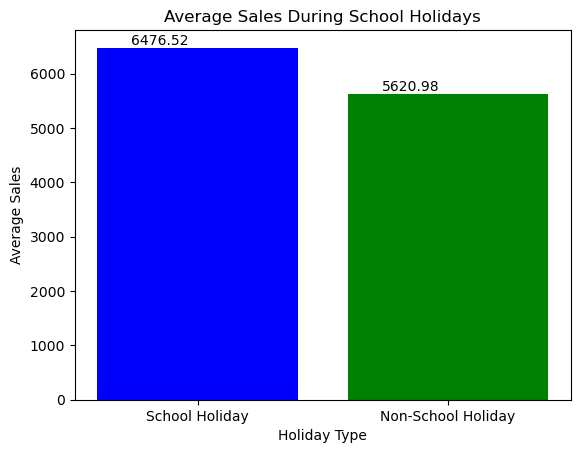

In [22]:
import matplotlib.pyplot as plt

# Calculate average sales during school holidays and non-school holidays
avg_sales_school_holiday = train[train['SchoolHoliday'] == 1]['Sales'].mean()
avg_sales_non_school_holiday = train[train['SchoolHoliday'] == 0]['Sales'].mean()

# Create a bar chart
categories = ['School Holiday', 'Non-School Holiday']
average_sales = [avg_sales_school_holiday, avg_sales_non_school_holiday]

fig, ax = plt.subplots()
bars = plt.bar(categories, average_sales, color=['blue', 'green'])

# Add text annotations directly to each bar
for bar, avg_sale in zip(bars, average_sales):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height(),
             f'{avg_sale:.2f}', ha='center', va='bottom', color='black', fontsize=10)

plt.title('Average Sales During School Holidays')
plt.xlabel('Holiday Type')
plt.ylabel('Average Sales')
plt.show()


- Conclusion :

> Whether the school is on holiday or not has little impact on sales

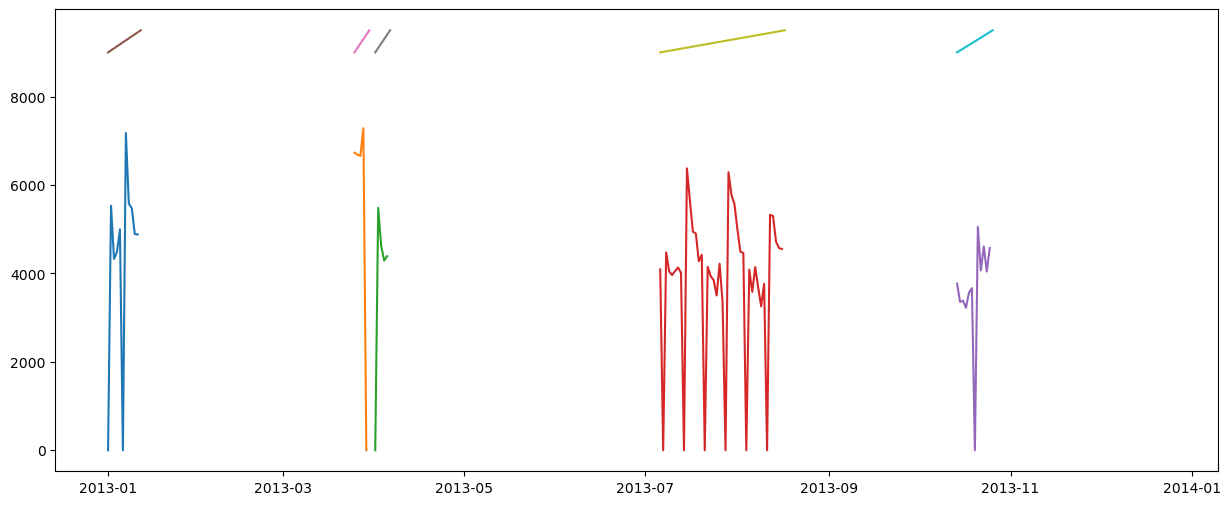

In [23]:
X=[]
Y=[]
X_=[]
Y_=[]
train_data_store1 = train_all[train_all.Store==1][::-1].reset_index()
train_data_store1 = train_data_store1[:360]
holiday_start = False
holiday_end = False
x_temp = []
y_temp = []
plt.figure(figsize=(15,6))
for i in range(len(train_data_store1)):
    d = train_data_store1.loc[i]
    if d.SchoolHoliday==1 and (i==0 or train_data_store1.loc[i-1].SchoolHoliday==0):
        X.append(d.Date)
        Y.append(9000)
        holiday_start = True
        holiday_end = False
        x_temp = []
        y_temp = []
    if d.SchoolHoliday==0 and (i==len(train_data_store1)-1 or train_data_store1.loc[i-1].SchoolHoliday==1):
        X.append(d.Date)
        Y.append(9500)
        holiday_end = True
        holiday_start = False
    if holiday_start and not holiday_end:
        x_temp.append(d.Date)
        y_temp.append(d.Sales)
    if holiday_end and not holiday_start:
        X_.append(x_temp)
        Y_.append(y_temp)
        holiday_end = False

for i in range(len(X_)):
    plt.plot(X_[i], Y_[i])
for i in range(0, min(len(X), len(Y)), 2):
    plt.plot(X[i:i+2], Y[i:i+2])
        

The sales volume during the holidays is not obvious. It seems that the impact of the holidays on sales should not be large, at least not the main factor.

No Holiday        986159
Public Holiday     20260
Easter Holiday      6690
Christmas           4100
Name: StateHoliday, dtype: int64
   DayOfWeek    StateHoliday        Sales
0          1  Easter Holiday  7947.210526
1          1      No Holiday  8216.288492
2          1  Public Holiday  8416.077670
3          2      No Holiday  7088.553007
4          2  Public Holiday  6052.650000
StateHoliday     Christmas  Easter Holiday   No Holiday  Public Holiday
DayOfWeek                                                              
1                      NaN     7947.210526  8216.288492     8416.077670
2                      NaN             NaN  7088.553007     6052.650000
3              8387.352941             NaN  6728.046282     8863.333333
4              9828.085714             NaN  6762.089015     8331.899344
5             10802.000000    13575.180000  7068.902277     9591.314286


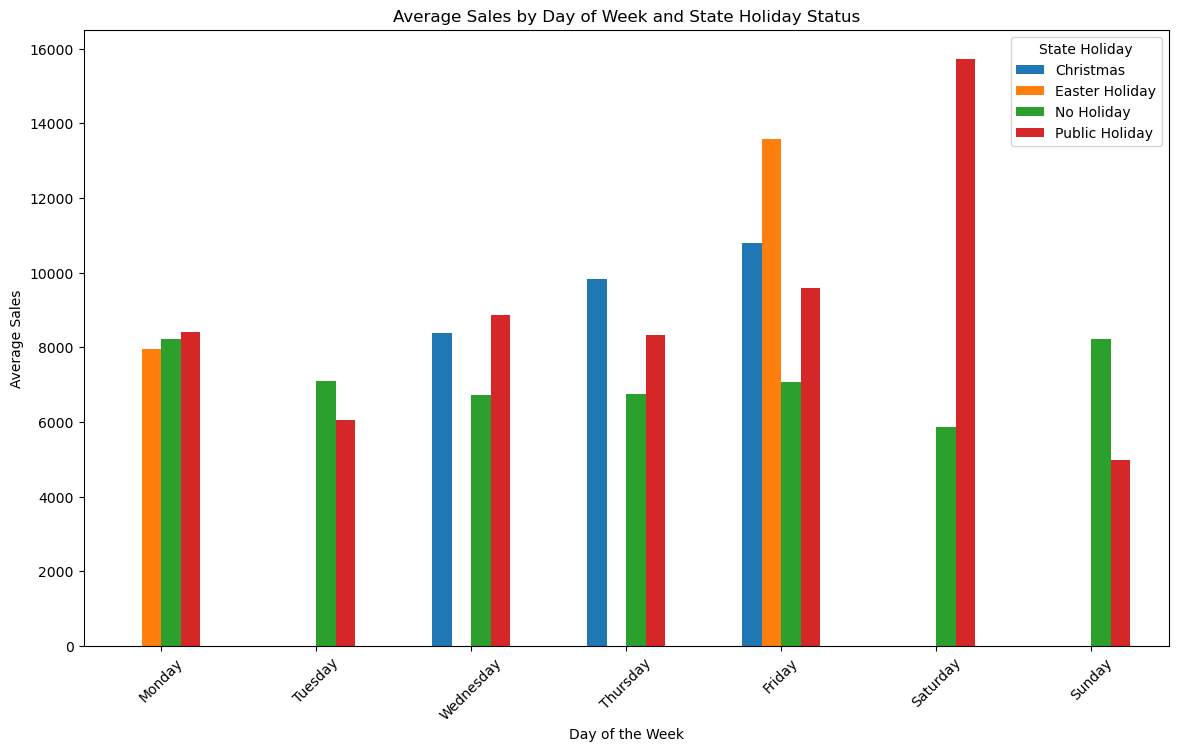

In [24]:
train_data['StateHoliday'] = train_data['StateHoliday'].astype(str).replace({'0': 'No Holiday', 'a': 'Public Holiday', 'b': 'Easter Holiday', 'c': 'Christmas'})

print(train_data['StateHoliday'].value_counts())

train_data = train_data[(train_data['Open'] == 1) & (train_data['Sales'] > 0)]

avg_sales_by_day_holiday = train_data.groupby(['DayOfWeek', 'StateHoliday'])['Sales'].mean().reset_index()


print(avg_sales_by_day_holiday.head())

avg_sales_pivot = avg_sales_by_day_holiday.pivot(index='DayOfWeek', columns='StateHoliday', values='Sales')

print(avg_sales_pivot.head())

plt.figure(figsize=(14, 8))
avg_sales_pivot.plot(kind='bar', ax=plt.gca())
plt.title('Average Sales by Day of Week and State Holiday Status')
plt.xlabel('Day of the Week')
plt.ylabel('Average Sales')
plt.xticks(ticks=range(7), labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=45)
plt.legend(title='State Holiday')
plt.show()


The bar chart indicates that average sales are generally higher on public holidays and Christmas, with a significant peak on Fridays and Saturdays, while sales on Sundays are notably lower regardless of holiday status.

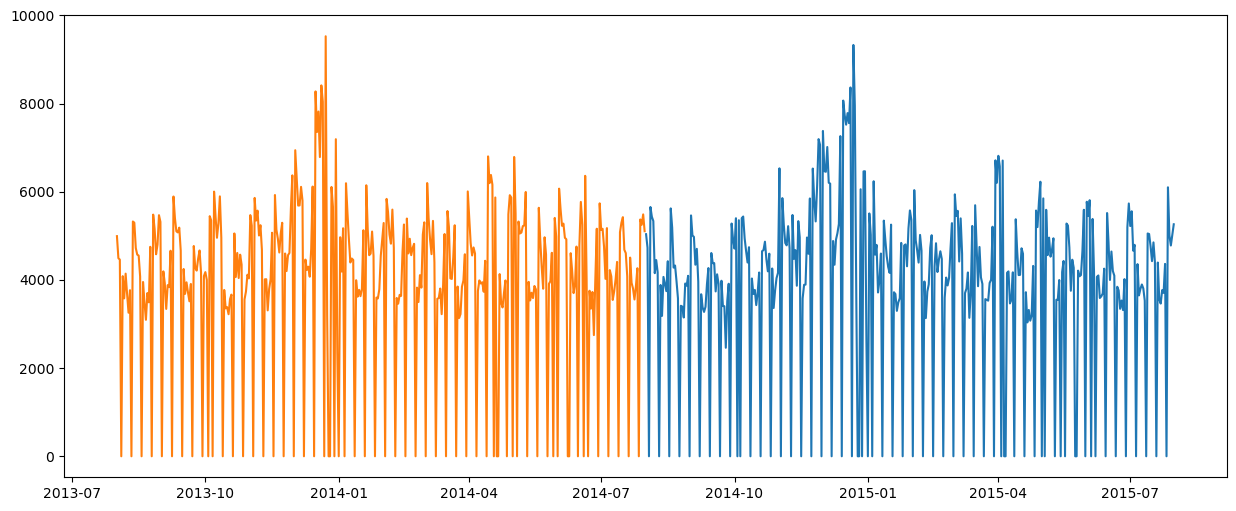

In [25]:
plt.figure(figsize=(15,6))
plt.plot(train_all[train_all.Store==1].Date[:365], train_all[train_all.Store==1].Sales[:365])
plt.plot(train_all[train_all.Store==1].Date[365:365+365], train_all[train_all.Store==1].Sales[365:365+365])

The above picture is very important. It shows the sales trend chart of the two adjacent years. 

We can find that they are generally consistent. This illustrates a problem. 

Sales volume is closely related to the date, that is to say, the same period in each year.

During the period, the sales may be very close, which is a bit like the seasonal characteristics of many industries. 

This information shows that the specific date is crucial to prediction, so we need to extract the specific year and month. , daily information.

In [26]:
print('DayOfWeek <=5 Sales.mean：'+str(train_data[train_data['DayOfWeek'] <=5].Sales.mean()))
print('DayOfWeek =6 Sales.mean：'+str(train_data[train_data['DayOfWeek'] ==6].Sales.mean()))
print('DayOfWeek =7 Sales.mean：'+str(train_data[train_data['DayOfWeek'] ==7].Sales.mean()))

DayOfWeek <=5 Sales.mean：7172.903208443317
DayOfWeek =6 Sales.mean：5875.084934606947
DayOfWeek =7 Sales.mean：8224.723907598107


It can be seen that compared to Saturday, Sunday has a huge impact on sales, mainly because many stores are closed on this day (PS: closed cases are not included in the final score).

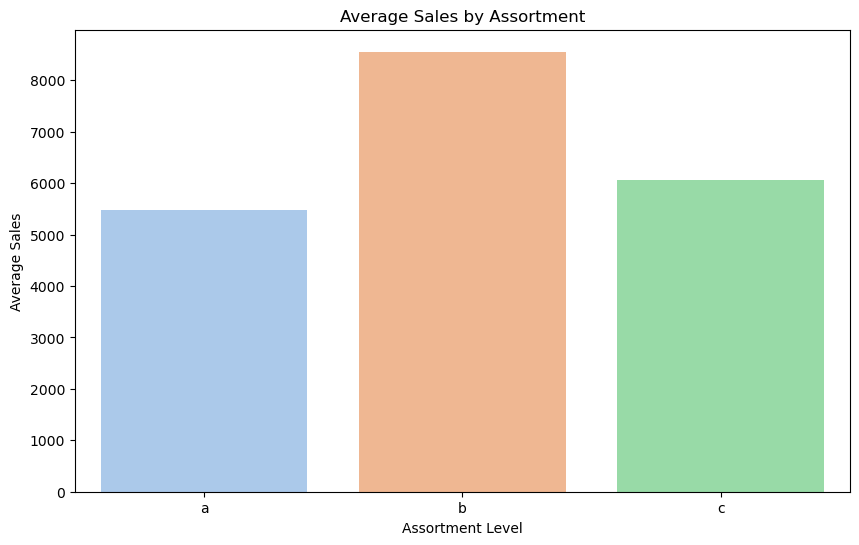

In [27]:
assortment_sales = train_all.groupby('Assortment')['Sales'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Assortment', y='Sales', data=assortment_sales, palette='pastel')
plt.title('Average Sales by Assortment')
plt.xlabel('Assortment Level')
plt.ylabel('Average Sales')
plt.show()


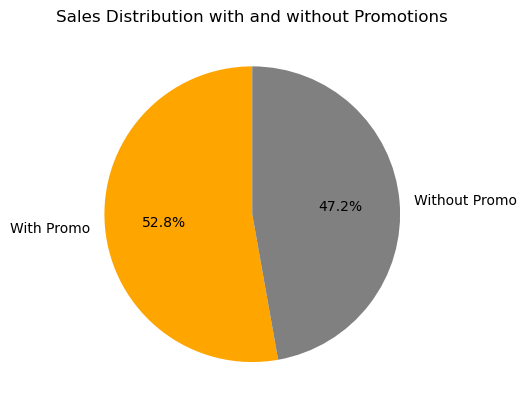

In [28]:
total_sales_with_promo = train[train['Promo'] == 1]['Sales'].sum()
total_sales_without_promo = train[train['Promo'] == 0]['Sales'].sum()
labels = ['With Promo', 'Without Promo']
sizes = [total_sales_with_promo, total_sales_without_promo]
colors = ['orange', 'gray']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Sales Distribution with and without Promotions')
plt.show()

The pie chart shows that sales with promotions (52.8%) are almost the same as sales without promotions (47.2%), indicating promotions have a moderate effect on sales.

### Mining information related to continuous promotion activities: PromoIntervel, Promo2SinceWeek, Promo2SinceYear
Two fields can be developed:

1. IsInPromo: respectively indicates whether the current store is in ongoing promotion activities on a certain day: based on Date, Promo2 and PromoIntervel.
2. PromoDays: The time the promotion has lasted: based on Date and Promo2SinceYear, Promo2SinceWeek.

In [29]:
def is_in_promo(data):
    month2str = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 
                 7:'Jul', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'}
    data['monthStr'] = data.Month.map(month2str)
    data.loc[data.PromoInterval == 0, 'PromoInterval'] = ''
    data['IsPromoMonth'] = 0
    for interval in data.PromoInterval.unique():
        if interval != '':
            for month in interval.split(','):
                data.loc[(data.monthStr == month) & (data.PromoInterval == interval), 'IsPromoMonth'] = 1

In [30]:
def get_promo_months(data):
    data['PromoOpen'] = 12*(data.Year - data.Promo2SinceYear) + (data.WeekOfYear - data.Promo2SinceWeek)/4.0
    data['PromoOpen'] = data['PromoOpen'].apply(lambda x: x if x>0 else 0)

### Competitor information mining: CompetitionOpenSinceYear, CompetitionOpenSinceMonth

According to general understanding, competitors should also have a great impact on store sales. After all, the market share in the same area is fixed. A competitor that is relatively close and has been open for a long time (time-honored brand?) still has an impact on sales. It’s stressful, let’s analyze it below.

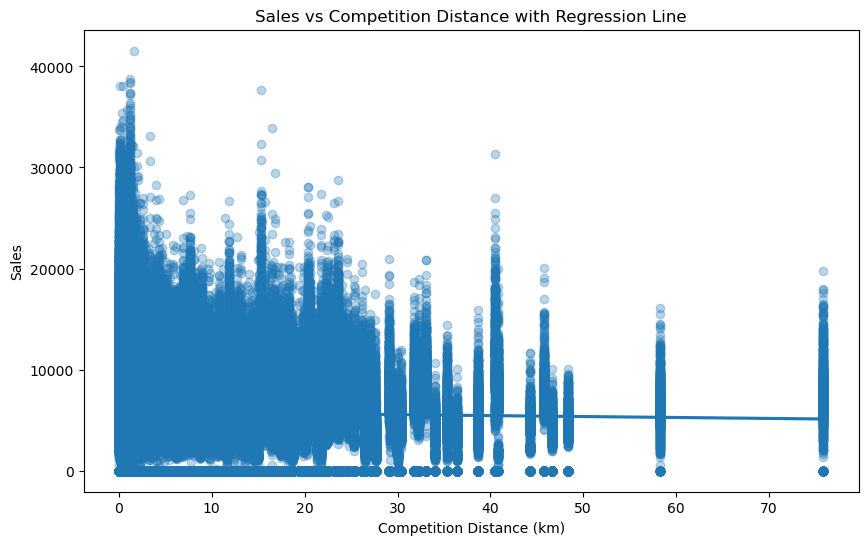

In [31]:
train_all['CompetitionDistance_km'] = train_all['CompetitionDistance'] / 1000.0
plt.figure(figsize=(10, 6))
sns.regplot(x='CompetitionDistance_km', y='Sales', data=train_all, scatter_kws={'alpha': 0.3})
plt.title('Sales vs Competition Distance with Regression Line')
plt.xlabel('Competition Distance (km)')
plt.ylabel('Sales')
plt.show()


We can see a strange phenomenon that seems to be inconsistent with our expectations. It is not that the farther away the competitors are, the higher the sales will be. On the contrary, it is somewhat the opposite. This may be caused by the characteristics of similar business circles. For example, there are several companies in this generation. If there are the same stores, do people tend to go to these places to buy such products? Then there will be a feeling of mutual promotion, which is very interesting.


Let’s take a look at the relationship with competitors’ opening times.

Add:
1. CompetitionOpenMonths。

In [32]:
def get_competition_openmonths(data):
    data['CompetitionOpen'] = 12*(data.Year - data.CompetitionOpenSinceYear)+(data.Month - data.CompetitionOpenSinceMonth)
    data['CompetitionOpen'] = data['CompetitionOpen'].apply(lambda x:x if x>0 else 0)

## Feature Engineering
### Add new fields discovered
#### Year, Month, Day, WeekOfYear, IsWorkDay

In [33]:
get_datetime_info(ho_train)
get_datetime_info(ho_test)
get_datetime_info(test_all)

C:\Users\ariel\AppData\Local\Temp\ipykernel_3628\520213015.py:10: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  data['WeekOfYear'] = data.Date.dt.weekofyear
C:\Users\ariel\AppData\Local\Temp\ipykernel_3628\520213015.py:10: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  data['WeekOfYear'] = data.Date.dt.weekofyear
C:\Users\ariel\AppData\Local\Temp\ipykernel_3628\520213015.py:10: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  data['WeekOfYear'] = data.Date.dt.weekofyear


#### Visualization

<Axes: xlabel='Month'>

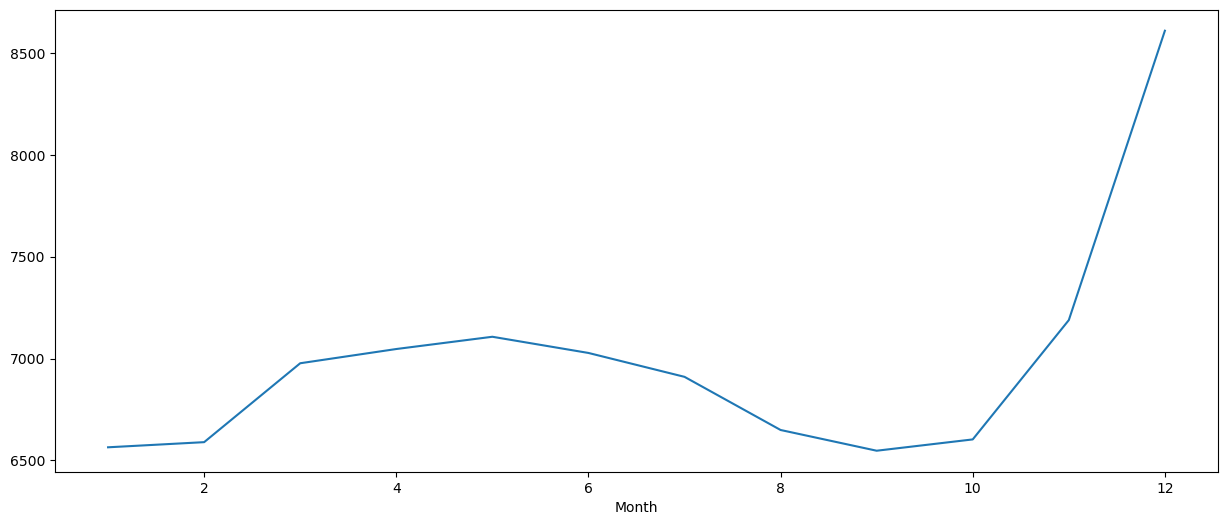

In [34]:
plt.figure(figsize=(15,6))
ho_train.groupby(['Month']).Sales.mean().plot()

<Axes: xlabel='WeekOfYear'>

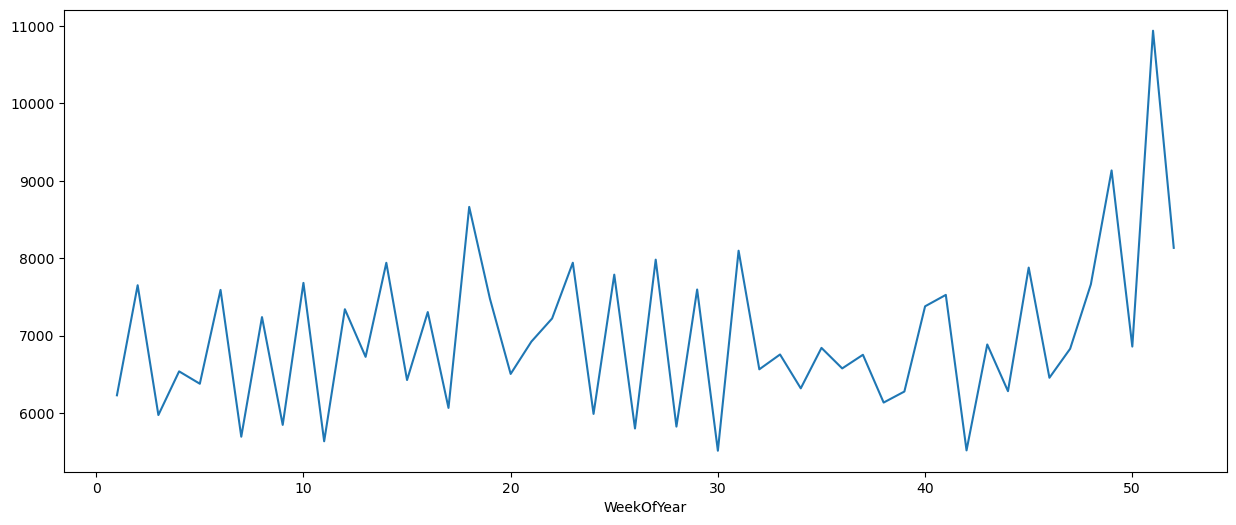

In [35]:
plt.figure(figsize=(15,6))
ho_train.groupby(['WeekOfYear']).Sales.mean().plot()

#### IsInPromo, PromoDays

In [36]:
is_in_promo(ho_train)
is_in_promo(ho_test)
is_in_promo(test_all)

In [37]:
get_promo_months(ho_train)
get_promo_months(ho_test)
get_promo_months(test_all)

C:\Users\ariel\AppData\Local\Temp\ipykernel_3628\2916014217.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(x='PromoInterval', y='Sales', data=promo_interval_sales, color='blue', markers='o', linestyles='-', ci=None)


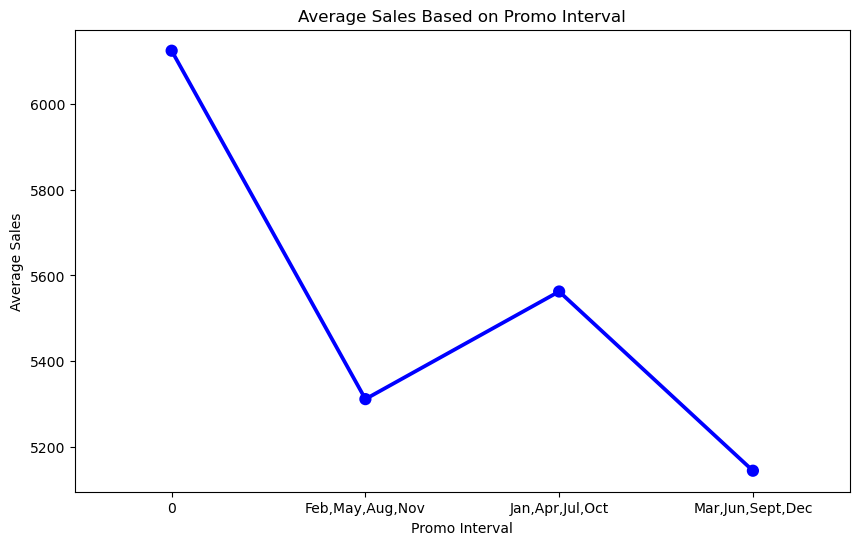

In [38]:
promo_interval_sales = train_all.groupby('PromoInterval')['Sales'].mean().reset_index()
 
promo_interval_sales['PromoInterval'] = pd.Categorical(promo_interval_sales['PromoInterval'],
                                                       categories=promo_interval_sales['PromoInterval'].unique(),
                                                       ordered=True)
 
promo_interval_sales = promo_interval_sales.sort_values('PromoInterval')
 
plt.figure(figsize=(10, 6))
sns.pointplot(x='PromoInterval', y='Sales', data=promo_interval_sales, color='blue', markers='o', linestyles='-', ci=None)
plt.title('Average Sales Based on Promo Interval')
plt.xlabel('Promo Interval')
plt.ylabel('Average Sales')
plt.show()
 

#### Visualization

<Axes: xlabel='IsPromoMonth'>

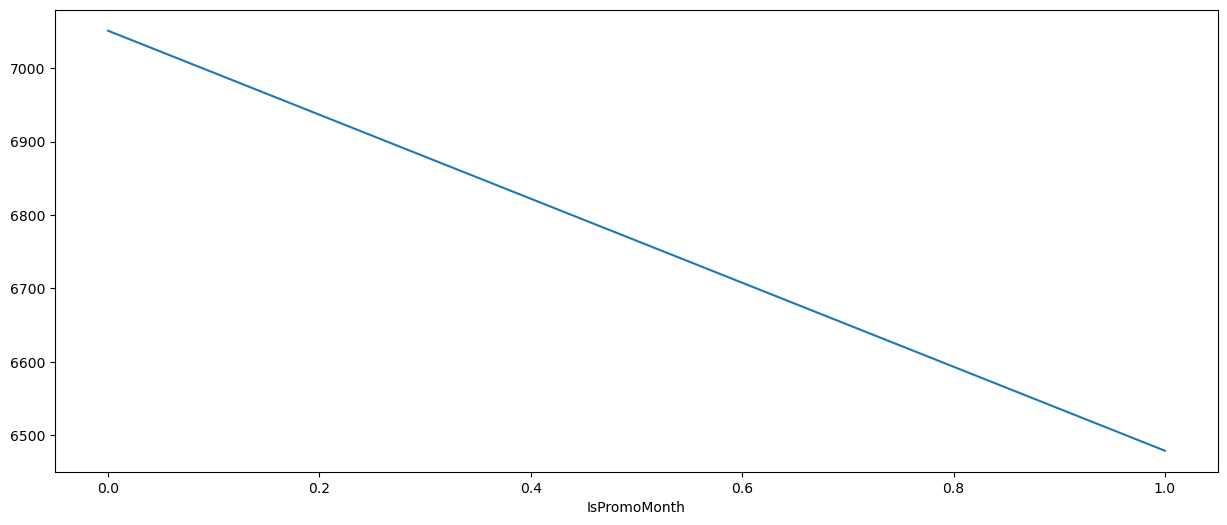

In [39]:
plt.figure(figsize=(15,6))
ho_train.groupby(['IsPromoMonth']).Sales.mean().plot()

<Axes: xlabel='PromoOpen'>

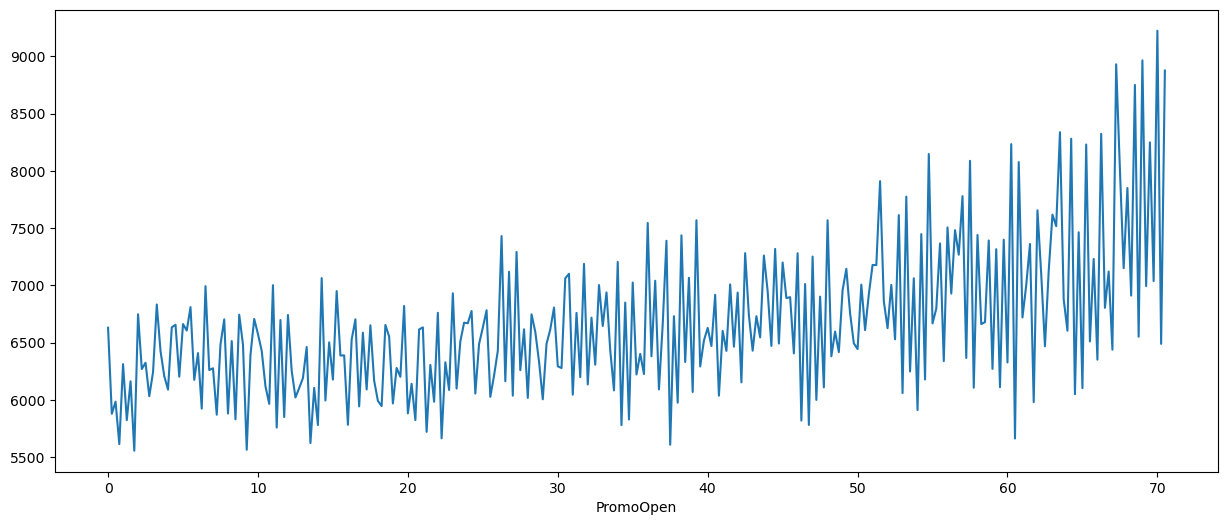

In [40]:
plt.figure(figsize=(15,6))
ho_train[ho_train.PromoOpen<1000].groupby(['PromoOpen']).Sales.mean().plot()

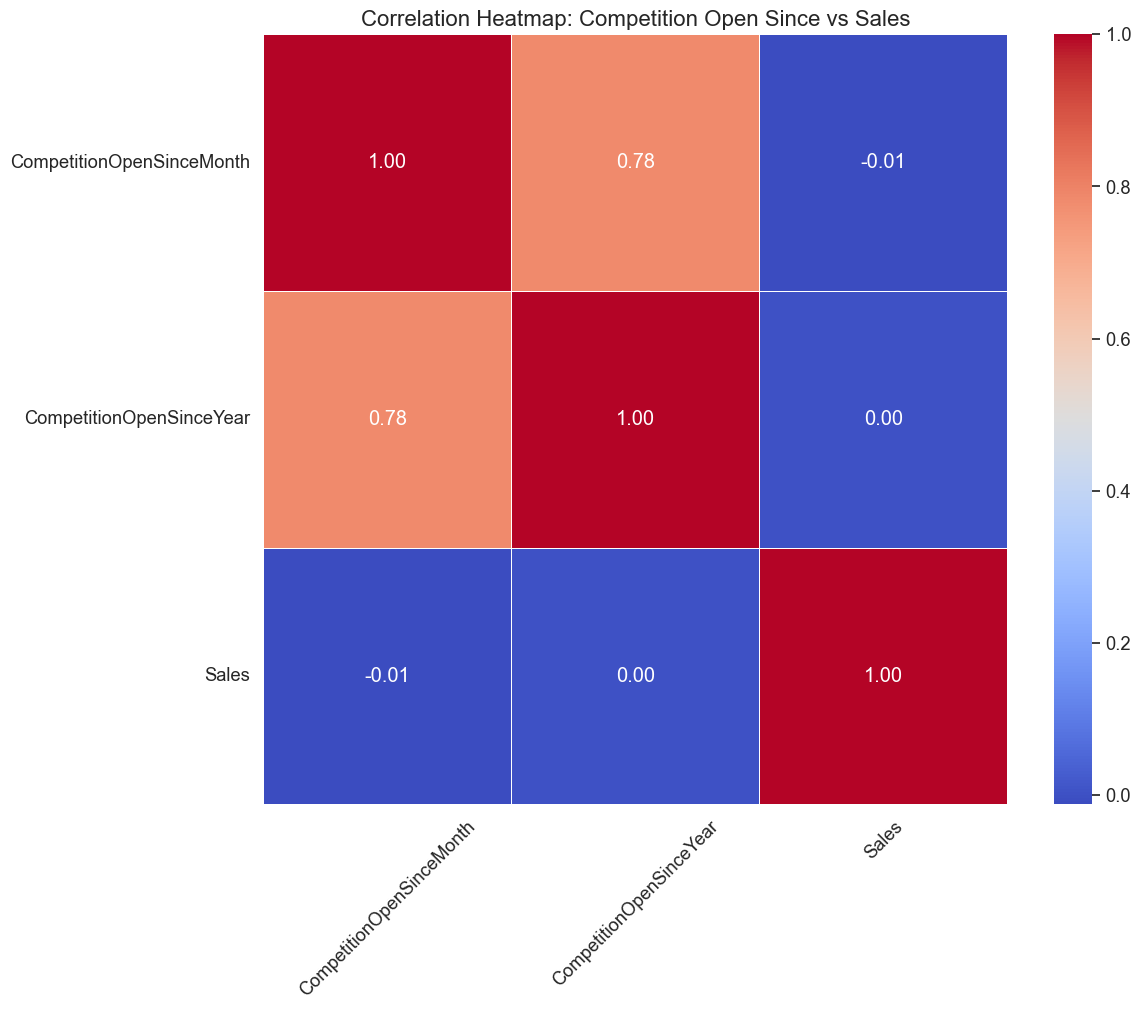

In [41]:
heatmap_data = train_all[['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Sales']]
 
correlation_matrix = heatmap_data.corr()
 
plt.figure(figsize=(12, 10))
sns.set(font_scale=1.2)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap: Competition Open Since vs Sales', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

In [42]:
ho_train.head()[['Year','Promo2SinceYear','WeekOfYear','Promo2SinceWeek','PromoOpen']]

,Year,Promo2SinceYear,WeekOfYear,Promo2SinceWeek,PromoOpen
284584,2015,2013.0,25,31.0,22.50
417104,2015,0.0,25,0.0,24186.25
875290,2015,0.0,25,0.0,24186.25
119580,2015,2012.0,25,27.0,35.50
807974,2015,2009.0,25,37.0,69.00


The above indicates that the impact of promotions on sales is very obvious, but the duration also has an impact. Note that some stores' Promo2SinceYear is 0, causing PromoOpen to calculate a large value.

#### CompetitionOpenMonths

In [43]:
get_competition_openmonths(ho_train)
get_competition_openmonths(ho_test)
get_competition_openmonths(test_all)

### Useless fields are discarded. Note that test.csv does not have Customers data.

Date, Customers, Open, PromoInterval, monthStr

In [44]:
ho_train.drop(['Date','Customers','Open','PromoInterval','monthStr'],axis=1,inplace =True)
ho_test.drop(['Date','Customers','Open','PromoInterval','monthStr'],axis=1,inplace =True)

In [45]:
ho_train.columns

Index(['Store', 'DayOfWeek', 'Sales', 'Promo', 'StateHoliday', 'SchoolHoliday',
       'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'Year', 'Month', 'Day',
       'WeekOfYear', 'IsPromoMonth', 'PromoOpen', 'CompetitionOpen'],
      dtype='object')

### Enum field One-Hot encoding
The current enumeration fields are:

- StateHoliday: National holiday, general holidays and national holidays will be closed, all schools will be closed on public holidays, a=public holiday, b=Eastern holiday, c=Christmas, 0=not a holiday.

- StoreType: Store type, there are four types, abcd.
- Assortment: Assortment level, a=basic, b=additional, c=extended.

It should exist like a node in the model, that is, as four nodes that guide data in four directions, so a, b, c, and d are mapped to 1, 2, 3, and 4 without using OneHot encoding. After all, The dimensionality increases after encoding.

In [46]:
def one_hot(data):
    mappings = {'0':0, 'a':1, 'b':2, 'c':3, 'd':4}
    data.StoreType.replace(mappings, inplace=True)
    data.Assortment.replace(mappings, inplace=True)
    data.StateHoliday.replace(mappings, inplace=True)
    float_columns = ["CompetitionDistance", "CompetitionOpenSinceMonth", 
                            "CompetitionOpenSinceYear", "Promo2SinceWeek", 
                            "Promo2SinceYear"]
    data[float_columns] = data[float_columns].astype(int)

In [47]:
one_hot(ho_train)
one_hot(ho_test)
one_hot(test_all)

## Numerical data normalization processing

This is mainly to avoid inconsistent weights of fields caused by numerical values ​​in their impact on prediction results. Therefore, normalization is performed, that is, the impact of each field is considered to be the same.

Numeric fields include:

- Sales: Don’t worry about the forecast value.
- CompetitionDistance.
- PromoDays.
- CompetitionOpenMonths.

But there is a problem. If the training data and test data are normalized separately, because the min and max used for normalization are different, it is unknown whether it will have an impact on the prediction, so normalization will not be performed for the time being.

## Extract target fields

In [48]:
ho_xtrain = ho_train.drop(['Sales'],axis=1 )
ho_ytrain = np.log1p(ho_train.Sales)
ho_xtest = ho_test.drop(['Sales'],axis=1 )
ho_ytest = np.log1p(ho_test.Sales)

## Baseline model

The baseline model uses a constant guess as the mean value.

First calculate the mean value of Sales in the training set.

In [49]:
pred_base = np.expm1(ho_ytrain).mean()
print('Baseline model predictions：'+str(pred_base))

Baseline model predictions：6954.82295387386


## RMSPE
1. Calculate the percentage error for each prediction, which is defined as (actual value-predict value)/actual value.

2. Compute the average of the squared percentage errors.

3. Take the square root of the average squared percentage errors to obtain the final Root Mean Square Percentage Error (rmspe) metric.

In [50]:
def rmspe(y, yhat):
    return np.sqrt(np.mean((yhat/y-1) ** 2))

def rmspe_xg(yhat, y):
    y = np.expm1(y.get_label())
    yhat = np.expm1(yhat)
    return "rmspe", rmspe(y,yhat)

The difference from RMSE is that /y_i processing is introduced, so that low sales volume will not be ignored.

## Calculate the performance of a baseline model

In [51]:
print('baseline model RMSPE：'+str(rmspe([pred_base]*len(ho_ytest), np.expm1(ho_ytest))))

baseline model RMSPE：0.43923013383429027


high error rate

### Model building
Import library, training data processing

In [52]:
#!pip install xgboost

In [53]:
import xgboost as xgb
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

train_matrix = xgb.DMatrix(x_train, y_train)
valid_matrix = xgb.DMatrix(x_valid, y_valid)
watchlist = [(train_matrix, 'train'), (valid_matrix, 'valid')]

### Training

#### Model training

xgboost 
1. Choose a larger learning rate, typically in the range of 0.05 to 0.3, and then set an appropriate number of n_estimators corresponding to this learning rate.

2. Tune the parameters max_depth and min_child_weight, as these two parameters have a significant impact on the results.

3. Optimize the parameters subsample and colsample_bytree.

4. Fine-tune the gamma parameter.

5. Decrease the learning rate and then find a suitablen_estimators to match it.

In [54]:
train_matrix = xgb.DMatrix(ho_xtrain, ho_ytrain)
valid_matrix = xgb.DMatrix(ho_xtest, ho_ytest)
watchlist = [(train_matrix, 'train'), (valid_matrix, 'valid')]

In [55]:
params_opt = {"objective": "reg:linear",
          "booster" : "gbtree",
          "eta": 0.03,
          "max_depth": 10,
          "subsample": 0.9,
          "colsample_bytree": 0.7,
          "silent": 1,
          "seed": 66
          }
num_boost_round_opt = 6000

In [56]:
def train(params, num_boost_round):
    print('XGBoost Model Train Start....')
    start_time = time.time()
    model = xgb.train(params, train_matrix, num_boost_round, evals=watchlist, 
                      early_stopping_rounds=100, feval=rmspe_xg, verbose_eval=True)
    print('XGBoost Model Train End, Time: {:4f} s....'.format(time.time()-start_time))
    return model

In [57]:
model_opt = train(params_opt, num_boost_round_opt)

XGBoost Model Train Start....


C:\Users\ariel\anaconda3\Lib\site-packages\xgboost\training.py:38: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(
C:\Users\ariel\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [00:35:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
C:\Users\ariel\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [00:35:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	train-rmse:0.42039	train-rmspe:0.55184	valid-rmse:0.41107	valid-rmspe:0.50246
[1]	train-rmse:0.41468	train-rmspe:0.54251	valid-rmse:0.40557	valid-rmspe:0.49331
[2]	train-rmse:0.40997	train-rmspe:0.53365	valid-rmse:0.40115	valid-rmspe:0.48514
[3]	train-rmse:0.40571	train-rmspe:0.52458	valid-rmse:0.39712	valid-rmspe:0.47632
[4]	train-rmse:0.40072	train-rmspe:0.51575	valid-rmse:0.39231	valid-rmspe:0.46774
[5]	train-rmse:0.39656	train-rmspe:0.50889	valid-rmse:0.38819	valid-rmspe:0.46101
[6]	train-rmse:0.39284	train-rmspe:0.50127	valid-rmse:0.38463	valid-rmspe:0.45384
[7]	train-rmse:0.38847	train-rmspe:0.49430	valid-rmse:0.38036	valid-rmspe:0.44667
[8]	train-rmse:0.38505	train-rmspe:0.48802	valid-rmse:0.37720	valid-rmspe:0.44067
[9]	train-rmse:0.38130	train-rmspe:0.48261	valid-rmse:0.37339	valid-rmspe:0.43501
[10]	train-rmse:0.37727	train-rmspe:0.47698	valid-rmse:0.36950	valid-rmspe:0.42937
[11]	train-rmse:0.37419	train-rmspe:0.47125	valid-rmse:0.36640	valid-rmspe:0.42395
[12]	train-rms

[99]	train-rmse:0.24576	train-rmspe:0.30216	valid-rmse:0.25164	valid-rmspe:0.27778
[100]	train-rmse:0.24508	train-rmspe:0.30146	valid-rmse:0.25101	valid-rmspe:0.27697
[101]	train-rmse:0.24425	train-rmspe:0.30061	valid-rmse:0.25024	valid-rmspe:0.27605
[102]	train-rmse:0.24388	train-rmspe:0.30012	valid-rmse:0.25017	valid-rmspe:0.27614
[103]	train-rmse:0.24305	train-rmspe:0.29925	valid-rmse:0.24954	valid-rmspe:0.27537
[104]	train-rmse:0.24245	train-rmspe:0.29858	valid-rmse:0.24899	valid-rmspe:0.27466
[105]	train-rmse:0.24160	train-rmspe:0.29755	valid-rmse:0.24856	valid-rmspe:0.27443
[106]	train-rmse:0.24061	train-rmspe:0.29653	valid-rmse:0.24763	valid-rmspe:0.27332
[107]	train-rmse:0.23976	train-rmspe:0.29556	valid-rmse:0.24698	valid-rmspe:0.27246
[108]	train-rmse:0.23928	train-rmspe:0.29419	valid-rmse:0.24656	valid-rmspe:0.27212
[109]	train-rmse:0.23870	train-rmspe:0.29341	valid-rmse:0.24601	valid-rmspe:0.27139
[110]	train-rmse:0.23788	train-rmspe:0.29260	valid-rmse:0.24523	valid-rmspe:0

[197]	train-rmse:0.18314	train-rmspe:0.23363	valid-rmse:0.19824	valid-rmspe:0.21647
[198]	train-rmse:0.18279	train-rmspe:0.23319	valid-rmse:0.19790	valid-rmspe:0.21609
[199]	train-rmse:0.18257	train-rmspe:0.23292	valid-rmse:0.19758	valid-rmspe:0.21579
[200]	train-rmse:0.18200	train-rmspe:0.23090	valid-rmse:0.19712	valid-rmspe:0.21523
[201]	train-rmse:0.18170	train-rmspe:0.23062	valid-rmse:0.19680	valid-rmspe:0.21490
[202]	train-rmse:0.18105	train-rmspe:0.23000	valid-rmse:0.19627	valid-rmspe:0.21437
[203]	train-rmse:0.18059	train-rmspe:0.22953	valid-rmse:0.19577	valid-rmspe:0.21380
[204]	train-rmse:0.18039	train-rmspe:0.22936	valid-rmse:0.19566	valid-rmspe:0.21363
[205]	train-rmse:0.18023	train-rmspe:0.22915	valid-rmse:0.19555	valid-rmspe:0.21352
[206]	train-rmse:0.17953	train-rmspe:0.22847	valid-rmse:0.19490	valid-rmspe:0.21275
[207]	train-rmse:0.17934	train-rmspe:0.22827	valid-rmse:0.19467	valid-rmspe:0.21247
[208]	train-rmse:0.17867	train-rmspe:0.22764	valid-rmse:0.19406	valid-rmspe:

[295]	train-rmse:0.14496	train-rmspe:0.18054	valid-rmse:0.16490	valid-rmspe:0.17988
[296]	train-rmse:0.14465	train-rmspe:0.18025	valid-rmse:0.16463	valid-rmspe:0.17960
[297]	train-rmse:0.14424	train-rmspe:0.17988	valid-rmse:0.16425	valid-rmspe:0.17918
[298]	train-rmse:0.14414	train-rmspe:0.17974	valid-rmse:0.16421	valid-rmspe:0.17920
[299]	train-rmse:0.14388	train-rmspe:0.17949	valid-rmse:0.16399	valid-rmspe:0.17892
[300]	train-rmse:0.14362	train-rmspe:0.17923	valid-rmse:0.16378	valid-rmspe:0.17866
[301]	train-rmse:0.14316	train-rmspe:0.17885	valid-rmse:0.16333	valid-rmspe:0.17819
[302]	train-rmse:0.14293	train-rmspe:0.17865	valid-rmse:0.16321	valid-rmspe:0.17806
[303]	train-rmse:0.14259	train-rmspe:0.17832	valid-rmse:0.16292	valid-rmspe:0.17772
[304]	train-rmse:0.14214	train-rmspe:0.17788	valid-rmse:0.16255	valid-rmspe:0.17731
[305]	train-rmse:0.14199	train-rmspe:0.17699	valid-rmse:0.16244	valid-rmspe:0.17719
[306]	train-rmse:0.14175	train-rmspe:0.17677	valid-rmse:0.16222	valid-rmspe:

[393]	train-rmse:0.12426	train-rmspe:0.15434	valid-rmse:0.14814	valid-rmspe:0.16138
[394]	train-rmse:0.12415	train-rmspe:0.15424	valid-rmse:0.14812	valid-rmspe:0.16140
[395]	train-rmse:0.12409	train-rmspe:0.15418	valid-rmse:0.14808	valid-rmspe:0.16135
[396]	train-rmse:0.12384	train-rmspe:0.15392	valid-rmse:0.14788	valid-rmspe:0.16110
[397]	train-rmse:0.12376	train-rmspe:0.15384	valid-rmse:0.14782	valid-rmspe:0.16104
[398]	train-rmse:0.12364	train-rmspe:0.15371	valid-rmse:0.14773	valid-rmspe:0.16095
[399]	train-rmse:0.12331	train-rmspe:0.15335	valid-rmse:0.14748	valid-rmspe:0.16063
[400]	train-rmse:0.12318	train-rmspe:0.15323	valid-rmse:0.14733	valid-rmspe:0.16048
[401]	train-rmse:0.12296	train-rmspe:0.15300	valid-rmse:0.14717	valid-rmspe:0.16029
[402]	train-rmse:0.12285	train-rmspe:0.15290	valid-rmse:0.14706	valid-rmspe:0.16017
[403]	train-rmse:0.12269	train-rmspe:0.15274	valid-rmse:0.14694	valid-rmspe:0.16004
[404]	train-rmse:0.12263	train-rmspe:0.15267	valid-rmse:0.14688	valid-rmspe:

[491]	train-rmse:0.11164	train-rmspe:0.13892	valid-rmse:0.13797	valid-rmspe:0.15010
[492]	train-rmse:0.11143	train-rmspe:0.13871	valid-rmse:0.13781	valid-rmspe:0.14991
[493]	train-rmse:0.11120	train-rmspe:0.13851	valid-rmse:0.13764	valid-rmspe:0.14972
[494]	train-rmse:0.11113	train-rmspe:0.13845	valid-rmse:0.13761	valid-rmspe:0.14968
[495]	train-rmse:0.11107	train-rmspe:0.13839	valid-rmse:0.13757	valid-rmspe:0.14964
[496]	train-rmse:0.11101	train-rmspe:0.13834	valid-rmse:0.13753	valid-rmspe:0.14960
[497]	train-rmse:0.11083	train-rmspe:0.13818	valid-rmse:0.13737	valid-rmspe:0.14943
[498]	train-rmse:0.11075	train-rmspe:0.13775	valid-rmse:0.13735	valid-rmspe:0.14942
[499]	train-rmse:0.11067	train-rmspe:0.13766	valid-rmse:0.13728	valid-rmspe:0.14935
[500]	train-rmse:0.11064	train-rmspe:0.13758	valid-rmse:0.13726	valid-rmspe:0.14932
[501]	train-rmse:0.11052	train-rmspe:0.13747	valid-rmse:0.13719	valid-rmspe:0.14924
[502]	train-rmse:0.11047	train-rmspe:0.13742	valid-rmse:0.13716	valid-rmspe:

[589]	train-rmse:0.10330	train-rmspe:0.12725	valid-rmse:0.13169	valid-rmspe:0.14308
[590]	train-rmse:0.10323	train-rmspe:0.12721	valid-rmse:0.13164	valid-rmspe:0.14303
[591]	train-rmse:0.10318	train-rmspe:0.12717	valid-rmse:0.13160	valid-rmspe:0.14298
[592]	train-rmse:0.10316	train-rmspe:0.12713	valid-rmse:0.13156	valid-rmspe:0.14294
[593]	train-rmse:0.10298	train-rmspe:0.12694	valid-rmse:0.13143	valid-rmspe:0.14278
[594]	train-rmse:0.10296	train-rmspe:0.12692	valid-rmse:0.13138	valid-rmspe:0.14271
[595]	train-rmse:0.10283	train-rmspe:0.12679	valid-rmse:0.13130	valid-rmspe:0.14263
[596]	train-rmse:0.10268	train-rmspe:0.12663	valid-rmse:0.13118	valid-rmspe:0.14250
[597]	train-rmse:0.10264	train-rmspe:0.12661	valid-rmse:0.13118	valid-rmspe:0.14250
[598]	train-rmse:0.10256	train-rmspe:0.12652	valid-rmse:0.13111	valid-rmspe:0.14241
[599]	train-rmse:0.10252	train-rmspe:0.12647	valid-rmse:0.13112	valid-rmspe:0.14243
[600]	train-rmse:0.10245	train-rmspe:0.12639	valid-rmse:0.13107	valid-rmspe:

[687]	train-rmse:0.09748	train-rmspe:0.11826	valid-rmse:0.12782	valid-rmspe:0.13883
[688]	train-rmse:0.09747	train-rmspe:0.11825	valid-rmse:0.12781	valid-rmspe:0.13882
[689]	train-rmse:0.09740	train-rmspe:0.11819	valid-rmse:0.12776	valid-rmspe:0.13876
[690]	train-rmse:0.09733	train-rmspe:0.11812	valid-rmse:0.12771	valid-rmspe:0.13870
[691]	train-rmse:0.09728	train-rmspe:0.11806	valid-rmse:0.12768	valid-rmspe:0.13866
[692]	train-rmse:0.09724	train-rmspe:0.11802	valid-rmse:0.12765	valid-rmspe:0.13864
[693]	train-rmse:0.09718	train-rmspe:0.11793	valid-rmse:0.12758	valid-rmspe:0.13852
[694]	train-rmse:0.09713	train-rmspe:0.11788	valid-rmse:0.12755	valid-rmspe:0.13848
[695]	train-rmse:0.09704	train-rmspe:0.11778	valid-rmse:0.12748	valid-rmspe:0.13841
[696]	train-rmse:0.09700	train-rmspe:0.11773	valid-rmse:0.12746	valid-rmspe:0.13839
[697]	train-rmse:0.09697	train-rmspe:0.11770	valid-rmse:0.12745	valid-rmspe:0.13838
[698]	train-rmse:0.09692	train-rmspe:0.11766	valid-rmse:0.12742	valid-rmspe:

[785]	train-rmse:0.09353	train-rmspe:0.11233	valid-rmse:0.12566	valid-rmspe:0.13653
[786]	train-rmse:0.09349	train-rmspe:0.11228	valid-rmse:0.12564	valid-rmspe:0.13650
[787]	train-rmse:0.09346	train-rmspe:0.11225	valid-rmse:0.12562	valid-rmspe:0.13648
[788]	train-rmse:0.09336	train-rmspe:0.11216	valid-rmse:0.12556	valid-rmspe:0.13641
[789]	train-rmse:0.09333	train-rmspe:0.11212	valid-rmse:0.12550	valid-rmspe:0.13631
[790]	train-rmse:0.09330	train-rmspe:0.11209	valid-rmse:0.12549	valid-rmspe:0.13630
[791]	train-rmse:0.09326	train-rmspe:0.11199	valid-rmse:0.12546	valid-rmspe:0.13627
[792]	train-rmse:0.09319	train-rmspe:0.11185	valid-rmse:0.12542	valid-rmspe:0.13622
[793]	train-rmse:0.09316	train-rmspe:0.11183	valid-rmse:0.12540	valid-rmspe:0.13620
[794]	train-rmse:0.09313	train-rmspe:0.11180	valid-rmse:0.12541	valid-rmspe:0.13621
[795]	train-rmse:0.09310	train-rmspe:0.11176	valid-rmse:0.12539	valid-rmspe:0.13619
[796]	train-rmse:0.09306	train-rmspe:0.11172	valid-rmse:0.12537	valid-rmspe:

[883]	train-rmse:0.09029	train-rmspe:0.10688	valid-rmse:0.12420	valid-rmspe:0.13491
[884]	train-rmse:0.09027	train-rmspe:0.10685	valid-rmse:0.12419	valid-rmspe:0.13490
[885]	train-rmse:0.09026	train-rmspe:0.10683	valid-rmse:0.12419	valid-rmspe:0.13490
[886]	train-rmse:0.09020	train-rmspe:0.10678	valid-rmse:0.12415	valid-rmspe:0.13486
[887]	train-rmse:0.09018	train-rmspe:0.10675	valid-rmse:0.12413	valid-rmspe:0.13483
[888]	train-rmse:0.09014	train-rmspe:0.10672	valid-rmse:0.12412	valid-rmspe:0.13482
[889]	train-rmse:0.09012	train-rmspe:0.10668	valid-rmse:0.12411	valid-rmspe:0.13481
[890]	train-rmse:0.09009	train-rmspe:0.10664	valid-rmse:0.12409	valid-rmspe:0.13479
[891]	train-rmse:0.09008	train-rmspe:0.10663	valid-rmse:0.12408	valid-rmspe:0.13477
[892]	train-rmse:0.09007	train-rmspe:0.10661	valid-rmse:0.12409	valid-rmspe:0.13478
[893]	train-rmse:0.09004	train-rmspe:0.10658	valid-rmse:0.12408	valid-rmspe:0.13477
[894]	train-rmse:0.09000	train-rmspe:0.10653	valid-rmse:0.12406	valid-rmspe:

[981]	train-rmse:0.08768	train-rmspe:0.10274	valid-rmse:0.12309	valid-rmspe:0.13370
[982]	train-rmse:0.08766	train-rmspe:0.10273	valid-rmse:0.12309	valid-rmspe:0.13370
[983]	train-rmse:0.08764	train-rmspe:0.10271	valid-rmse:0.12309	valid-rmspe:0.13369
[984]	train-rmse:0.08762	train-rmspe:0.10267	valid-rmse:0.12308	valid-rmspe:0.13369
[985]	train-rmse:0.08758	train-rmspe:0.10263	valid-rmse:0.12306	valid-rmspe:0.13367
[986]	train-rmse:0.08754	train-rmspe:0.10258	valid-rmse:0.12303	valid-rmspe:0.13364
[987]	train-rmse:0.08752	train-rmspe:0.10257	valid-rmse:0.12302	valid-rmspe:0.13363
[988]	train-rmse:0.08750	train-rmspe:0.10253	valid-rmse:0.12301	valid-rmspe:0.13362
[989]	train-rmse:0.08748	train-rmspe:0.10252	valid-rmse:0.12301	valid-rmspe:0.13361
[990]	train-rmse:0.08746	train-rmspe:0.10250	valid-rmse:0.12300	valid-rmspe:0.13360
[991]	train-rmse:0.08744	train-rmspe:0.10248	valid-rmse:0.12299	valid-rmspe:0.13358
[992]	train-rmse:0.08742	train-rmspe:0.10246	valid-rmse:0.12298	valid-rmspe:

[1078]	train-rmse:0.08558	train-rmspe:0.09947	valid-rmse:0.12252	valid-rmspe:0.13313
[1079]	train-rmse:0.08556	train-rmspe:0.09944	valid-rmse:0.12251	valid-rmspe:0.13313
[1080]	train-rmse:0.08553	train-rmspe:0.09927	valid-rmse:0.12253	valid-rmspe:0.13316
[1081]	train-rmse:0.08552	train-rmspe:0.09924	valid-rmse:0.12252	valid-rmspe:0.13315
[1082]	train-rmse:0.08549	train-rmspe:0.09920	valid-rmse:0.12251	valid-rmspe:0.13314
[1083]	train-rmse:0.08546	train-rmspe:0.09918	valid-rmse:0.12251	valid-rmspe:0.13313
[1084]	train-rmse:0.08544	train-rmspe:0.09915	valid-rmse:0.12249	valid-rmspe:0.13311
[1085]	train-rmse:0.08544	train-rmspe:0.09914	valid-rmse:0.12249	valid-rmspe:0.13311
[1086]	train-rmse:0.08542	train-rmspe:0.09913	valid-rmse:0.12249	valid-rmspe:0.13311
[1087]	train-rmse:0.08539	train-rmspe:0.09910	valid-rmse:0.12248	valid-rmspe:0.13309
[1088]	train-rmse:0.08537	train-rmspe:0.09907	valid-rmse:0.12248	valid-rmspe:0.13309
[1089]	train-rmse:0.08536	train-rmspe:0.09906	valid-rmse:0.12248	

[1175]	train-rmse:0.08374	train-rmspe:0.09663	valid-rmse:0.12200	valid-rmspe:0.13262
[1176]	train-rmse:0.08372	train-rmspe:0.09661	valid-rmse:0.12199	valid-rmspe:0.13261
[1177]	train-rmse:0.08371	train-rmspe:0.09658	valid-rmse:0.12199	valid-rmspe:0.13261
[1178]	train-rmse:0.08369	train-rmspe:0.09655	valid-rmse:0.12199	valid-rmspe:0.13262
[1179]	train-rmse:0.08367	train-rmspe:0.09653	valid-rmse:0.12200	valid-rmspe:0.13262
[1180]	train-rmse:0.08366	train-rmspe:0.09651	valid-rmse:0.12200	valid-rmspe:0.13262
[1181]	train-rmse:0.08364	train-rmspe:0.09648	valid-rmse:0.12198	valid-rmspe:0.13261
[1182]	train-rmse:0.08362	train-rmspe:0.09646	valid-rmse:0.12198	valid-rmspe:0.13260
[1183]	train-rmse:0.08360	train-rmspe:0.09644	valid-rmse:0.12196	valid-rmspe:0.13259
[1184]	train-rmse:0.08358	train-rmspe:0.09642	valid-rmse:0.12197	valid-rmspe:0.13259
[1185]	train-rmse:0.08355	train-rmspe:0.09638	valid-rmse:0.12196	valid-rmspe:0.13258
[1186]	train-rmse:0.08353	train-rmspe:0.09637	valid-rmse:0.12196	

[1272]	train-rmse:0.08205	train-rmspe:0.09400	valid-rmse:0.12149	valid-rmspe:0.13208
[1273]	train-rmse:0.08203	train-rmspe:0.09394	valid-rmse:0.12149	valid-rmspe:0.13207
[1274]	train-rmse:0.08203	train-rmspe:0.09393	valid-rmse:0.12148	valid-rmspe:0.13207
[1275]	train-rmse:0.08201	train-rmspe:0.09392	valid-rmse:0.12148	valid-rmspe:0.13206
[1276]	train-rmse:0.08200	train-rmspe:0.09390	valid-rmse:0.12147	valid-rmspe:0.13206
[1277]	train-rmse:0.08197	train-rmspe:0.09387	valid-rmse:0.12146	valid-rmspe:0.13205
[1278]	train-rmse:0.08195	train-rmspe:0.09384	valid-rmse:0.12147	valid-rmspe:0.13205
[1279]	train-rmse:0.08194	train-rmspe:0.09383	valid-rmse:0.12146	valid-rmspe:0.13205
[1280]	train-rmse:0.08192	train-rmspe:0.09380	valid-rmse:0.12146	valid-rmspe:0.13205
[1281]	train-rmse:0.08189	train-rmspe:0.09378	valid-rmse:0.12145	valid-rmspe:0.13203
[1282]	train-rmse:0.08188	train-rmspe:0.09377	valid-rmse:0.12145	valid-rmspe:0.13203
[1283]	train-rmse:0.08187	train-rmspe:0.09376	valid-rmse:0.12144	

[1369]	train-rmse:0.08048	train-rmspe:0.09140	valid-rmse:0.12110	valid-rmspe:0.13168
[1370]	train-rmse:0.08046	train-rmspe:0.09137	valid-rmse:0.12110	valid-rmspe:0.13167
[1371]	train-rmse:0.08044	train-rmspe:0.09136	valid-rmse:0.12110	valid-rmspe:0.13167
[1372]	train-rmse:0.08043	train-rmspe:0.09134	valid-rmse:0.12106	valid-rmspe:0.13161
[1373]	train-rmse:0.08042	train-rmspe:0.09133	valid-rmse:0.12105	valid-rmspe:0.13160
[1374]	train-rmse:0.08041	train-rmspe:0.09133	valid-rmse:0.12104	valid-rmspe:0.13160
[1375]	train-rmse:0.08039	train-rmspe:0.09131	valid-rmse:0.12104	valid-rmspe:0.13159
[1376]	train-rmse:0.08038	train-rmspe:0.09125	valid-rmse:0.12103	valid-rmspe:0.13158
[1377]	train-rmse:0.08037	train-rmspe:0.09124	valid-rmse:0.12103	valid-rmspe:0.13158
[1378]	train-rmse:0.08034	train-rmspe:0.09121	valid-rmse:0.12102	valid-rmspe:0.13156
[1379]	train-rmse:0.08033	train-rmspe:0.09120	valid-rmse:0.12102	valid-rmspe:0.13157
[1380]	train-rmse:0.08033	train-rmspe:0.09118	valid-rmse:0.12101	

[1466]	train-rmse:0.07907	train-rmspe:0.08916	valid-rmse:0.12064	valid-rmspe:0.13115
[1467]	train-rmse:0.07906	train-rmspe:0.08914	valid-rmse:0.12064	valid-rmspe:0.13115
[1468]	train-rmse:0.07905	train-rmspe:0.08909	valid-rmse:0.12064	valid-rmspe:0.13115
[1469]	train-rmse:0.07904	train-rmspe:0.08908	valid-rmse:0.12063	valid-rmspe:0.13114
[1470]	train-rmse:0.07901	train-rmspe:0.08905	valid-rmse:0.12063	valid-rmspe:0.13114
[1471]	train-rmse:0.07901	train-rmspe:0.08904	valid-rmse:0.12063	valid-rmspe:0.13114
[1472]	train-rmse:0.07899	train-rmspe:0.08903	valid-rmse:0.12063	valid-rmspe:0.13114
[1473]	train-rmse:0.07899	train-rmspe:0.08903	valid-rmse:0.12063	valid-rmspe:0.13114
[1474]	train-rmse:0.07897	train-rmspe:0.08900	valid-rmse:0.12063	valid-rmspe:0.13114
[1475]	train-rmse:0.07896	train-rmspe:0.08898	valid-rmse:0.12063	valid-rmspe:0.13114
[1476]	train-rmse:0.07894	train-rmspe:0.08897	valid-rmse:0.12062	valid-rmspe:0.13114
[1477]	train-rmse:0.07893	train-rmspe:0.08894	valid-rmse:0.12063	

[1563]	train-rmse:0.07780	train-rmspe:0.08717	valid-rmse:0.12049	valid-rmspe:0.13102
[1564]	train-rmse:0.07780	train-rmspe:0.08716	valid-rmse:0.12049	valid-rmspe:0.13103
[1565]	train-rmse:0.07779	train-rmspe:0.08715	valid-rmse:0.12050	valid-rmspe:0.13103
[1566]	train-rmse:0.07776	train-rmspe:0.08713	valid-rmse:0.12048	valid-rmspe:0.13101
[1567]	train-rmse:0.07775	train-rmspe:0.08711	valid-rmse:0.12047	valid-rmspe:0.13101
[1568]	train-rmse:0.07774	train-rmspe:0.08711	valid-rmse:0.12047	valid-rmspe:0.13100
[1569]	train-rmse:0.07773	train-rmspe:0.08708	valid-rmse:0.12047	valid-rmspe:0.13100
[1570]	train-rmse:0.07771	train-rmspe:0.08706	valid-rmse:0.12046	valid-rmspe:0.13098
[1571]	train-rmse:0.07769	train-rmspe:0.08704	valid-rmse:0.12046	valid-rmspe:0.13098
[1572]	train-rmse:0.07768	train-rmspe:0.08703	valid-rmse:0.12045	valid-rmspe:0.13098
[1573]	train-rmse:0.07766	train-rmspe:0.08688	valid-rmse:0.12045	valid-rmspe:0.13098
[1574]	train-rmse:0.07764	train-rmspe:0.08686	valid-rmse:0.12044	

[1660]	train-rmse:0.07658	train-rmspe:0.08527	valid-rmse:0.12028	valid-rmspe:0.13079
[1661]	train-rmse:0.07656	train-rmspe:0.08525	valid-rmse:0.12027	valid-rmspe:0.13079
[1662]	train-rmse:0.07656	train-rmspe:0.08524	valid-rmse:0.12027	valid-rmspe:0.13079
[1663]	train-rmse:0.07654	train-rmspe:0.08520	valid-rmse:0.12027	valid-rmspe:0.13079
[1664]	train-rmse:0.07651	train-rmspe:0.08515	valid-rmse:0.12025	valid-rmspe:0.13077
[1665]	train-rmse:0.07650	train-rmspe:0.08514	valid-rmse:0.12025	valid-rmspe:0.13077
[1666]	train-rmse:0.07649	train-rmspe:0.08513	valid-rmse:0.12025	valid-rmspe:0.13077
[1667]	train-rmse:0.07648	train-rmspe:0.08512	valid-rmse:0.12025	valid-rmspe:0.13076
[1668]	train-rmse:0.07647	train-rmspe:0.08509	valid-rmse:0.12025	valid-rmspe:0.13076
[1669]	train-rmse:0.07646	train-rmspe:0.08508	valid-rmse:0.12024	valid-rmspe:0.13076
[1670]	train-rmse:0.07645	train-rmspe:0.08506	valid-rmse:0.12024	valid-rmspe:0.13076
[1671]	train-rmse:0.07644	train-rmspe:0.08505	valid-rmse:0.12024	

[1757]	train-rmse:0.07549	train-rmspe:0.08351	valid-rmse:0.12003	valid-rmspe:0.13051
[1758]	train-rmse:0.07548	train-rmspe:0.08349	valid-rmse:0.12002	valid-rmspe:0.13051
[1759]	train-rmse:0.07547	train-rmspe:0.08347	valid-rmse:0.12002	valid-rmspe:0.13050
[1760]	train-rmse:0.07546	train-rmspe:0.08346	valid-rmse:0.12002	valid-rmspe:0.13050
[1761]	train-rmse:0.07545	train-rmspe:0.08345	valid-rmse:0.12002	valid-rmspe:0.13050
[1762]	train-rmse:0.07544	train-rmspe:0.08344	valid-rmse:0.12001	valid-rmspe:0.13049
[1763]	train-rmse:0.07542	train-rmspe:0.08342	valid-rmse:0.12000	valid-rmspe:0.13049
[1764]	train-rmse:0.07541	train-rmspe:0.08341	valid-rmse:0.12000	valid-rmspe:0.13048
[1765]	train-rmse:0.07540	train-rmspe:0.08339	valid-rmse:0.12000	valid-rmspe:0.13048
[1766]	train-rmse:0.07539	train-rmspe:0.08339	valid-rmse:0.11999	valid-rmspe:0.13047
[1767]	train-rmse:0.07539	train-rmspe:0.08338	valid-rmse:0.11999	valid-rmspe:0.13047
[1768]	train-rmse:0.07537	train-rmspe:0.08336	valid-rmse:0.11998	

[1854]	train-rmse:0.07449	train-rmspe:0.08208	valid-rmse:0.11989	valid-rmspe:0.13037
[1855]	train-rmse:0.07448	train-rmspe:0.08207	valid-rmse:0.11989	valid-rmspe:0.13037
[1856]	train-rmse:0.07447	train-rmspe:0.08205	valid-rmse:0.11989	valid-rmspe:0.13037
[1857]	train-rmse:0.07445	train-rmspe:0.08203	valid-rmse:0.11989	valid-rmspe:0.13037
[1858]	train-rmse:0.07444	train-rmspe:0.08202	valid-rmse:0.11989	valid-rmspe:0.13037
[1859]	train-rmse:0.07443	train-rmspe:0.08200	valid-rmse:0.11989	valid-rmspe:0.13037
[1860]	train-rmse:0.07442	train-rmspe:0.08199	valid-rmse:0.11989	valid-rmspe:0.13037
[1861]	train-rmse:0.07441	train-rmspe:0.08198	valid-rmse:0.11989	valid-rmspe:0.13036
[1862]	train-rmse:0.07441	train-rmspe:0.08197	valid-rmse:0.11989	valid-rmspe:0.13036
[1863]	train-rmse:0.07440	train-rmspe:0.08197	valid-rmse:0.11989	valid-rmspe:0.13037
[1864]	train-rmse:0.07439	train-rmspe:0.08195	valid-rmse:0.11988	valid-rmspe:0.13036
[1865]	train-rmse:0.07438	train-rmspe:0.08194	valid-rmse:0.11988	

[1951]	train-rmse:0.07355	train-rmspe:0.08064	valid-rmse:0.11980	valid-rmspe:0.13028
[1952]	train-rmse:0.07354	train-rmspe:0.08061	valid-rmse:0.11980	valid-rmspe:0.13028
[1953]	train-rmse:0.07353	train-rmspe:0.08058	valid-rmse:0.11980	valid-rmspe:0.13028
[1954]	train-rmse:0.07352	train-rmspe:0.08058	valid-rmse:0.11980	valid-rmspe:0.13029
[1955]	train-rmse:0.07351	train-rmspe:0.08057	valid-rmse:0.11979	valid-rmspe:0.13028
[1956]	train-rmse:0.07350	train-rmspe:0.08056	valid-rmse:0.11979	valid-rmspe:0.13027
[1957]	train-rmse:0.07349	train-rmspe:0.08055	valid-rmse:0.11979	valid-rmspe:0.13028
[1958]	train-rmse:0.07348	train-rmspe:0.08053	valid-rmse:0.11979	valid-rmspe:0.13028
[1959]	train-rmse:0.07347	train-rmspe:0.08051	valid-rmse:0.11979	valid-rmspe:0.13028
[1960]	train-rmse:0.07346	train-rmspe:0.08049	valid-rmse:0.11979	valid-rmspe:0.13028
[1961]	train-rmse:0.07345	train-rmspe:0.08049	valid-rmse:0.11979	valid-rmspe:0.13027
[1962]	train-rmse:0.07343	train-rmspe:0.08047	valid-rmse:0.11978	

[2048]	train-rmse:0.07263	train-rmspe:0.07930	valid-rmse:0.11971	valid-rmspe:0.13019
[2049]	train-rmse:0.07263	train-rmspe:0.07930	valid-rmse:0.11971	valid-rmspe:0.13020
[2050]	train-rmse:0.07262	train-rmspe:0.07929	valid-rmse:0.11971	valid-rmspe:0.13020
[2051]	train-rmse:0.07261	train-rmspe:0.07928	valid-rmse:0.11971	valid-rmspe:0.13020
[2052]	train-rmse:0.07260	train-rmspe:0.07927	valid-rmse:0.11971	valid-rmspe:0.13020
[2053]	train-rmse:0.07259	train-rmspe:0.07926	valid-rmse:0.11971	valid-rmspe:0.13019
[2054]	train-rmse:0.07258	train-rmspe:0.07925	valid-rmse:0.11971	valid-rmspe:0.13020
[2055]	train-rmse:0.07257	train-rmspe:0.07923	valid-rmse:0.11971	valid-rmspe:0.13019
[2056]	train-rmse:0.07256	train-rmspe:0.07923	valid-rmse:0.11970	valid-rmspe:0.13019
[2057]	train-rmse:0.07255	train-rmspe:0.07921	valid-rmse:0.11970	valid-rmspe:0.13018
[2058]	train-rmse:0.07255	train-rmspe:0.07921	valid-rmse:0.11970	valid-rmspe:0.13019
[2059]	train-rmse:0.07254	train-rmspe:0.07920	valid-rmse:0.11971	

In [58]:
# best_iteration
best_iteration = model_opt.best_iteration
print(best_iteration)

# min RMSPE
min_rmspe = model_opt.best_score
print(min_rmspe)

2016
0.130155


outcome：
[2016]	train-rmse:0.07292	train-rmspe:0.07973	valid-rmse:0.11970	valid-rmspe:0.13015

rmspe:

Calculate the percentage error for each prediction, which is defined as (actual value-predict value)/actual value.

Compute the average of the squared percentage errors.

Take the square root of the average squared percentage errors to obtain the final Root Mean Square Percentage Error (rmspe) metric.

### Model prediction

In [59]:
def predict(model, x_valid, y_valid):
    print('XGBoost Model Valid Start....')
    start_time = time.time()
    pred_valid = model.predict(xgb.DMatrix(x_valid))
    rmspe_value = rmspe(np.expm1(y_valid), np.expm1(pred_valid))
    print('Valid RMSPE:'+str(rmspe_value))
    print('XGBoost Model Valid End, Time: {:4f} s....'.format(time.time()-start_time))
    return pred_valid, rmspe_value

In [60]:
ho_xtest.sort_index(inplace=True) 
ho_ytest.sort_index(inplace=True) 
pred_valid_opt, rmspe_opt = predict(model_opt, ho_xtest, ho_ytest)

XGBoost Model Valid Start....
Valid RMSPE:0.13019545896504764
XGBoost Model Valid End, Time: 4.113748 s....


The RMSPE value reached 0.13019, which is essentially consistent with the data observed during training, albeit slightly higher.

##### Importance of model parameters

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

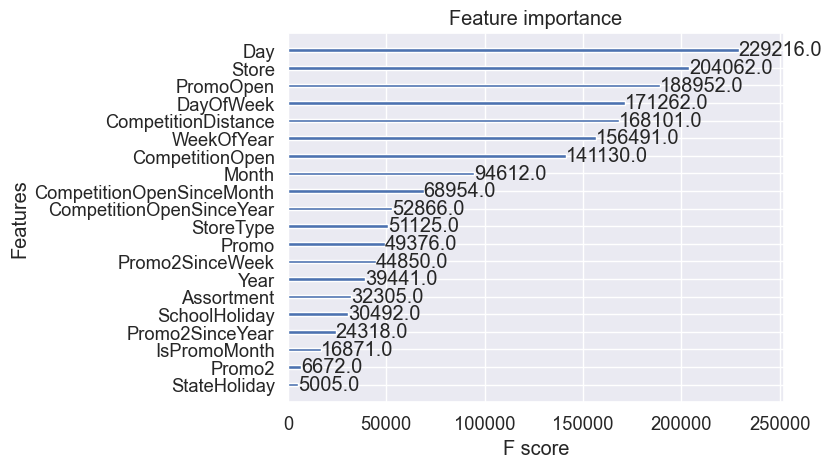

In [61]:
xgb.plot_importance(model_opt)

It can be observed that the most important features are Day and Store. This indicates the periodicity in sales and the unique characteristics of each store.

### Model saving

In [62]:
model_opt.save_model('v2-opt.model')

C:\Users\ariel\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [00:39:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  warnings.warn(smsg, UserWarning)


### Optimizaion model
Collect some relevant information about the model on the validation set and then determine optimization strategies.

In [63]:
valid_info = pd.DataFrame(data = ho_ytest)
valid_info['Pred'] = pred_valid_opt
valid_info = pd.merge(ho_xtest,valid_info, left_index= True, right_index=True)
valid_info['Ratio'] = valid_info.Pred/valid_info.Sales
valid_info['Error'] = abs(valid_info.Ratio-1)
valid_info['RelError'] = (valid_info.Ratio-1)
valid_info['Weight'] = valid_info.Sales/valid_info.Pred
valid_info.head()[['Sales','Pred','Ratio','Error','RelError','Weight']]

,Sales,Pred,Ratio,Error,RelError,Weight
0,8.568646,8.566239,0.999719,0.000281,-0.000281,1.000281
1,8.521384,8.465061,0.993390,0.006610,-0.006610,1.006654
2,8.472823,8.404133,0.991893,0.008107,-0.008107,1.008173
3,8.519590,8.406972,0.986781,0.013219,-0.013219,1.013396
4,8.716536,8.546276,0.980467,0.019533,-0.019533,1.019922


line chart below is the actual and predicted situations for three stores.

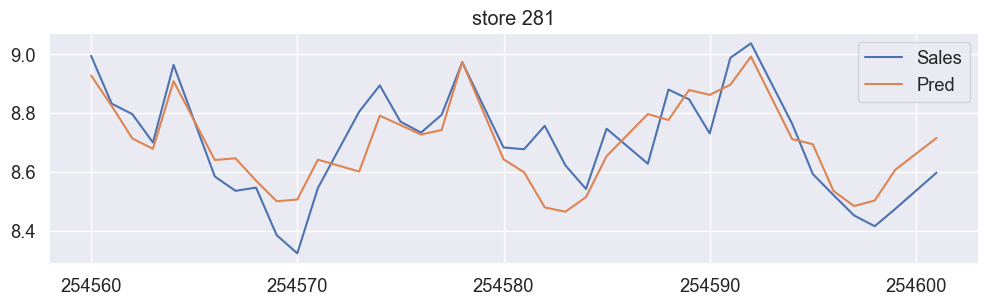

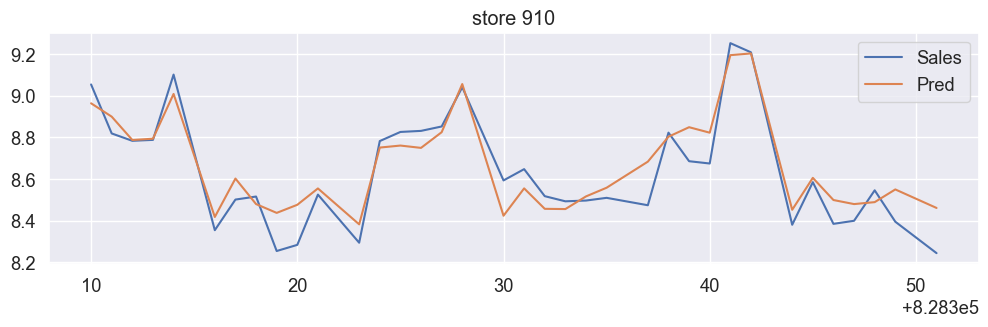

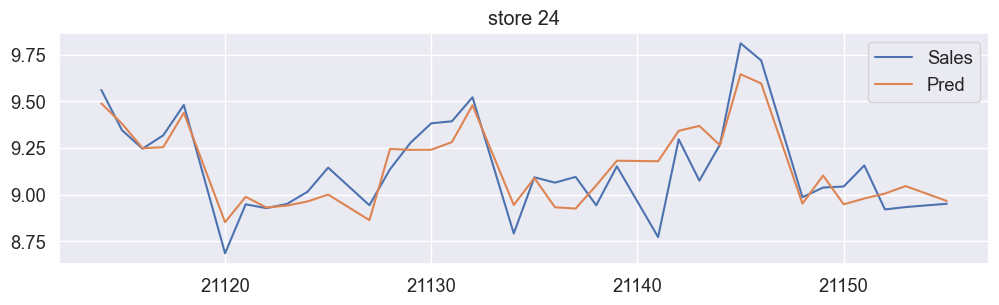

In [64]:
import random
stores = [random.choice(range(1,1116,1)) for i in range(3)]

for s in stores:
    store = pd.DataFrame(valid_info[valid_info['Store']==s],columns = ['Sales','Pred'])
    store.plot(title = 'store {}'.format(s),figsize=(12,3))

We can see the differences between the predicted values and the actual values. Now, let's examine the overall deviation.

In [65]:
print('Relative deviation：'+str(valid_info.RelError.mean()))

Relative deviation：0.00259654160450266


From the average relative deviation, it can be observed that our predictions are generally on the higher side. Therefore, the conditions for using a  calibration coefficient to address this overall deviation are satisfied.

Next, examine the average relative deviation for each store.

Relative deviation of each store：


<Axes: xlabel='Store'>

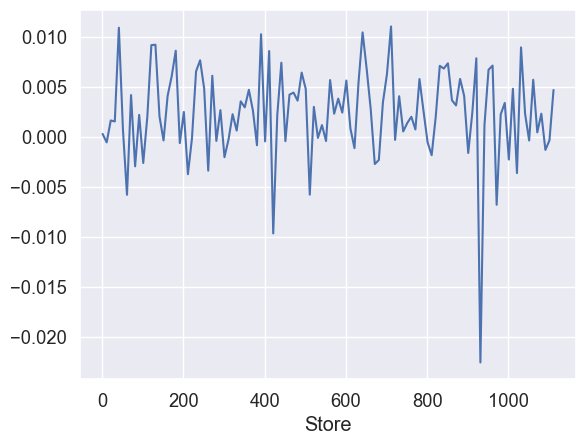

In [66]:
print('Relative deviation of each store：')
valid_info.groupby(['Store']).RelError.mean()[range(1,1116,10)].plot()

It can be observed that there are still significant differences between various stores. Since the data includes the 'Store'.

#### Calibration coefficient : corrects for overall bias

In [67]:
def get_fix_actor(pred_valid, y_valid):
    results = {}
    for actor in [0.950+i/1000. for i in range(100)]:
        results[actor]=rmspe(np.expm1(y_valid), np.expm1(pred_valid*actor))
    return results, sorted(results.items(),key = lambda x:x[1],reverse = True)[-1]

Before calibration：0.13019545896504764
After calibration：
(0.995, 0.12283461262805614)


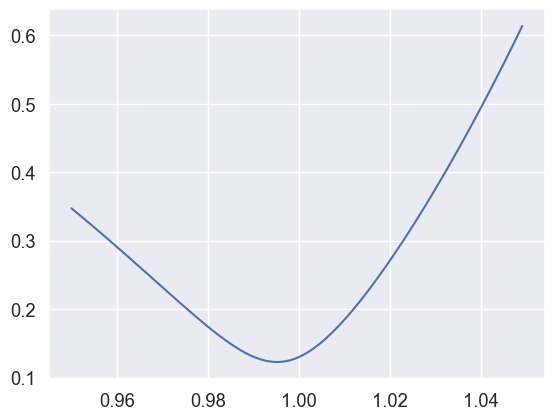

In [68]:
print('Before calibration：'+str(rmspe_opt))
print('After calibration：')
results, actor_score = get_fix_actor(pred_valid_opt, ho_ytest)
print(actor_score)
items = list(results.items())
items.sort()
plt.plot([k for k,v in items], [v for k,v in items])
actor = actor_score[0]


In [69]:
valid_info['Actor'] = [actor]*len(valid_info)

The effect is quite good, with a reduction of approximately 0.006. The optimal  calibration coefficient is 0.996. Below is the comparison between the data after applying the calibration coefficient, the original data, and the actual data.

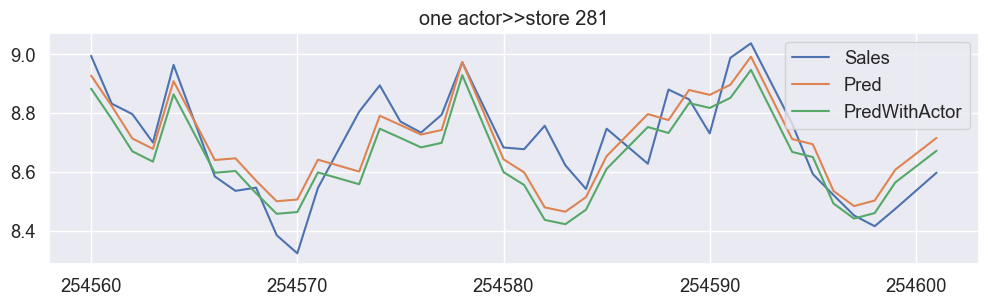

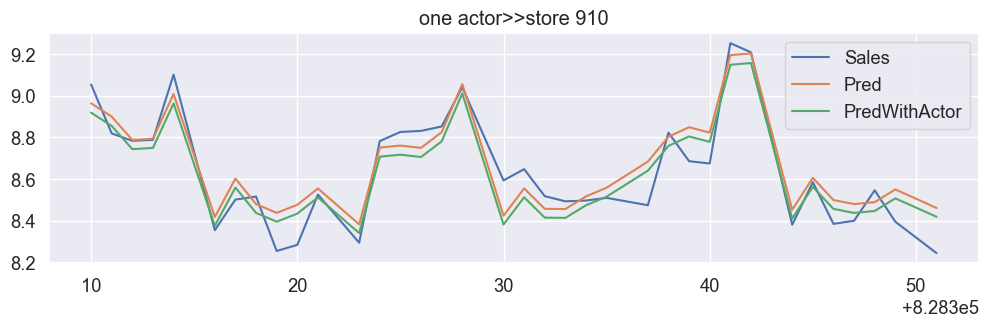

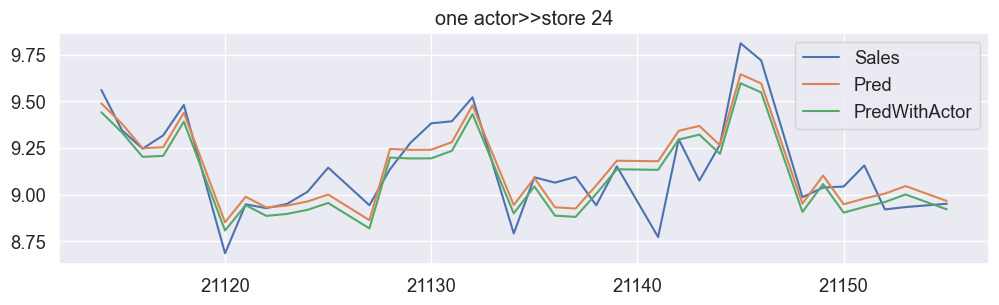

In [70]:
valid_info['PredWithActor'] = valid_info.Pred*valid_info.Actor
for s in stores:
    store = pd.DataFrame(valid_info[valid_info['Store']==s],columns = ['Sales','Pred', 'PredWithActor'])
    store.plot(title = 'one actor>>store {}'.format(s),figsize=(12,3))

As seen, compared to the uncalibrated points in red, the calibration points in green are noticeably closer to the actual data overall.

#### Setting calibration coefficients for each store

In [71]:
store_actor = pd.DataFrame({'Store':valid_info.Store.unique(),'StoreActor':pd.Series([0]*len(valid_info.Store.unique()))})

for i in range(store_actor.Store.min(),store_actor.Store.max()+1,1):
    idx = valid_info.Store==i
    results, actor_score = get_fix_actor(pred_valid_opt[idx], ho_ytest[idx])
    store_actor.StoreActor.iloc[i-1] = actor_score[0]

store_actor.head().append(store_actor.tail())

C:\Users\ariel\AppData\Local\Temp\ipykernel_3628\698813011.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  store_actor.head().append(store_actor.tail())


,Store,StoreActor
0,1,0.999
1,2,1.001
2,3,0.997
3,4,1.004
4,5,0.992
1110,1111,0.993
1111,1112,0.986
1112,1113,0.997
1113,1114,1.004
1114,1115,0.993


In [72]:
valid_info = pd.merge(valid_info, store_actor, on='Store')
valid_info.head()

,Store,DayOfWeek,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,...,CompetitionOpen,Sales,Pred,Ratio,Error,RelError,Weight,Actor,PredWithActor,StoreActor
0,1,4,1,0,1,3,1,1270,9,2008,...,82.0,8.568646,8.566239,0.999719,0.000281,-0.000281,1.000281,0.995,8.523408,0.999
1,1,3,1,0,1,3,1,1270,9,2008,...,82.0,8.521384,8.465061,0.993390,0.006610,-0.006610,1.006654,0.995,8.422736,0.999
2,1,2,1,0,1,3,1,1270,9,2008,...,82.0,8.472823,8.404133,0.991893,0.008107,-0.008107,1.008173,0.995,8.362112,0.999
3,1,1,1,0,1,3,1,1270,9,2008,...,82.0,8.519590,8.406972,0.986781,0.013219,-0.013219,1.013396,0.995,8.364937,0.999
4,1,0,1,0,1,3,1,1270,9,2008,...,82.0,8.716536,8.546276,0.980467,0.019533,-0.019533,1.019922,0.995,8.503545,0.999


##### The effect after applying calibration based on individual store.

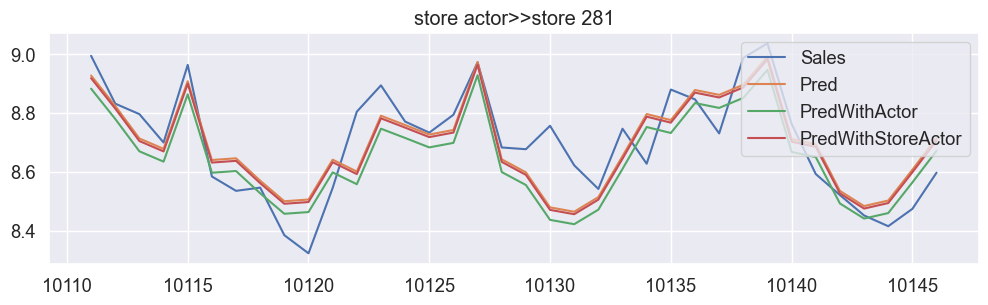

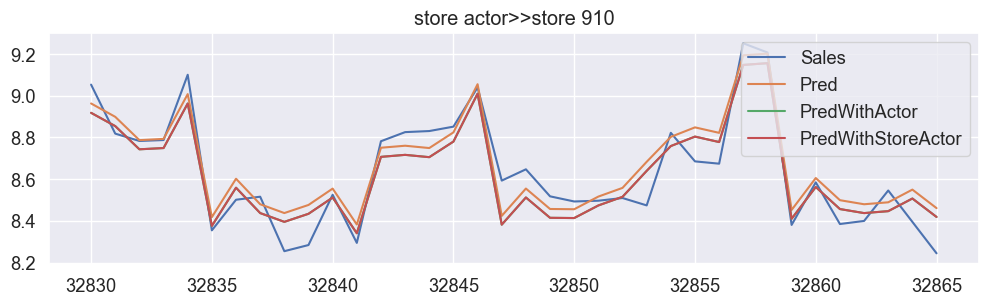

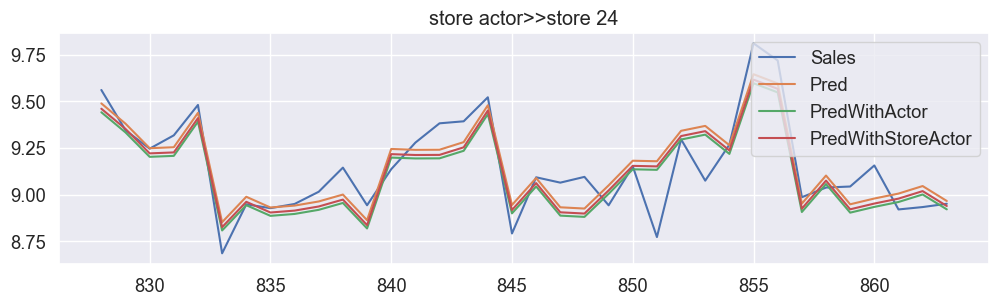

In [73]:
valid_info['PredWithStoreActor'] = valid_info.Pred*valid_info.StoreActor
for s in stores:
    store = pd.DataFrame(valid_info[valid_info['Store']==s],columns = ['Sales','Pred','PredWithActor','PredWithStoreActor'])
    store.plot(title = 'store actor>>store {}'.format(s),figsize=(12,3))

It's evident that the correction based on individual stores is much closer to the actual values.

#### rmspe

In [74]:
print('Base model：'+str(rmspe(np.expm1(ho_ytest), list(np.expm1(valid_info.Pred)))))
print('Base model + unified calibration：'+str(rmspe(np.expm1(ho_ytest), list(np.expm1(valid_info.PredWithActor)))))
print('Base model + separate calibration：'+str(rmspe(np.expm1(ho_ytest), list(np.expm1(valid_info.PredWithStoreActor)))))

Base model：0.13019545896504764
Base model + unified calibration：0.12283461358230276
Base model + separate calibration：0.11329331175645295


It can be seen that the calibration coefficients have a significant impact on improving the model, ultimately reducing the value from 0.126 to 0.110.

#### Incrementally train the validation set data into the model.

In [75]:
all_x = pd.concat([ho_xtrain, ho_xtest])
all_y = pd.concat([ho_ytrain, ho_ytest])
all_matrix = xgb.DMatrix(all_x, all_y)
watchlist_all = [(all_matrix, 'all'), (valid_matrix, 'valid')]
print('XGBoost Model Train Start....')
start_time = time.time()
model_opt_alldate = xgb.train(params_opt, all_matrix, 2899, evals=watchlist_all, 
                  early_stopping_rounds=100, feval=rmspe_xg, verbose_eval=True)
print('XGBoost Model Train End, Time: {:4f} s....'.format(time.time()-start_time))

XGBoost Model Train Start....


C:\Users\ariel\anaconda3\Lib\site-packages\xgboost\training.py:38: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(
C:\Users\ariel\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [00:40:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
C:\Users\ariel\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [00:40:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	all-rmse:0.41996	all-rmspe:0.54983	valid-rmse:0.41105	valid-rmspe:0.50267
[1]	all-rmse:0.41428	all-rmspe:0.54053	valid-rmse:0.40548	valid-rmspe:0.49339
[2]	all-rmse:0.40944	all-rmspe:0.53162	valid-rmse:0.40071	valid-rmspe:0.48480
[3]	all-rmse:0.40521	all-rmspe:0.52256	valid-rmse:0.39646	valid-rmspe:0.47570
[4]	all-rmse:0.40020	all-rmspe:0.51365	valid-rmse:0.39150	valid-rmspe:0.46700
[5]	all-rmse:0.39601	all-rmspe:0.50665	valid-rmse:0.38732	valid-rmspe:0.46007
[6]	all-rmse:0.39225	all-rmspe:0.49904	valid-rmse:0.38365	valid-rmspe:0.45260
[7]	all-rmse:0.38760	all-rmspe:0.49145	valid-rmse:0.37894	valid-rmspe:0.44477
[8]	all-rmse:0.38424	all-rmspe:0.48511	valid-rmse:0.37572	valid-rmspe:0.43856
[9]	all-rmse:0.38047	all-rmspe:0.47968	valid-rmse:0.37202	valid-rmspe:0.43293
[10]	all-rmse:0.37637	all-rmspe:0.47393	valid-rmse:0.36783	valid-rmspe:0.42705
[11]	all-rmse:0.37334	all-rmspe:0.46826	valid-rmse:0.36480	valid-rmspe:0.42154
[12]	all-rmse:0.36983	all-rmspe:0.46307	valid-rmse:0.36132	val

[104]	all-rmse:0.23849	all-rmspe:0.29157	valid-rmse:0.23523	valid-rmspe:0.25167
[105]	all-rmse:0.23777	all-rmspe:0.29064	valid-rmse:0.23468	valid-rmspe:0.25100
[106]	all-rmse:0.23691	all-rmspe:0.28976	valid-rmse:0.23384	valid-rmspe:0.25015
[107]	all-rmse:0.23607	all-rmspe:0.28878	valid-rmse:0.23312	valid-rmspe:0.24929
[108]	all-rmse:0.23557	all-rmspe:0.28744	valid-rmse:0.23266	valid-rmspe:0.24876
[109]	all-rmse:0.23530	all-rmspe:0.28711	valid-rmse:0.23244	valid-rmspe:0.24845
[110]	all-rmse:0.23432	all-rmspe:0.28615	valid-rmse:0.23145	valid-rmspe:0.24738
[111]	all-rmse:0.23397	all-rmspe:0.28576	valid-rmse:0.23115	valid-rmspe:0.24701
[112]	all-rmse:0.23339	all-rmspe:0.28513	valid-rmse:0.23085	valid-rmspe:0.24657
[113]	all-rmse:0.23236	all-rmspe:0.28401	valid-rmse:0.22983	valid-rmspe:0.24538
[114]	all-rmse:0.23186	all-rmspe:0.28351	valid-rmse:0.22942	valid-rmspe:0.24494
[115]	all-rmse:0.23129	all-rmspe:0.28278	valid-rmse:0.22890	valid-rmspe:0.24431
[116]	all-rmse:0.23098	all-rmspe:0.28227

[207]	all-rmse:0.17788	all-rmspe:0.22200	valid-rmse:0.17850	valid-rmspe:0.18826
[208]	all-rmse:0.17725	all-rmspe:0.22140	valid-rmse:0.17785	valid-rmspe:0.18754
[209]	all-rmse:0.17639	all-rmspe:0.22057	valid-rmse:0.17694	valid-rmspe:0.18654
[210]	all-rmse:0.17578	all-rmspe:0.22002	valid-rmse:0.17638	valid-rmspe:0.18596
[211]	all-rmse:0.17494	all-rmspe:0.21924	valid-rmse:0.17552	valid-rmspe:0.18504
[212]	all-rmse:0.17479	all-rmspe:0.21906	valid-rmse:0.17541	valid-rmspe:0.18493
[213]	all-rmse:0.17412	all-rmspe:0.21835	valid-rmse:0.17476	valid-rmspe:0.18424
[214]	all-rmse:0.17326	all-rmspe:0.21755	valid-rmse:0.17386	valid-rmspe:0.18329
[215]	all-rmse:0.17301	all-rmspe:0.21666	valid-rmse:0.17364	valid-rmspe:0.18306
[216]	all-rmse:0.17251	all-rmspe:0.21608	valid-rmse:0.17314	valid-rmspe:0.18251
[217]	all-rmse:0.17197	all-rmspe:0.21558	valid-rmse:0.17256	valid-rmspe:0.18188
[218]	all-rmse:0.17181	all-rmspe:0.21541	valid-rmse:0.17238	valid-rmspe:0.18170
[219]	all-rmse:0.17090	all-rmspe:0.21455

[310]	all-rmse:0.14068	all-rmspe:0.17236	valid-rmse:0.14129	valid-rmspe:0.14866
[311]	all-rmse:0.14055	all-rmspe:0.17148	valid-rmse:0.14117	valid-rmspe:0.14854
[312]	all-rmse:0.14048	all-rmspe:0.17140	valid-rmse:0.14108	valid-rmspe:0.14844
[313]	all-rmse:0.14007	all-rmspe:0.17042	valid-rmse:0.14067	valid-rmspe:0.14800
[314]	all-rmse:0.13947	all-rmspe:0.16977	valid-rmse:0.14006	valid-rmspe:0.14735
[315]	all-rmse:0.13918	all-rmspe:0.16950	valid-rmse:0.13975	valid-rmspe:0.14701
[316]	all-rmse:0.13909	all-rmspe:0.16942	valid-rmse:0.13965	valid-rmspe:0.14691
[317]	all-rmse:0.13898	all-rmspe:0.16929	valid-rmse:0.13949	valid-rmspe:0.14674
[318]	all-rmse:0.13877	all-rmspe:0.16910	valid-rmse:0.13926	valid-rmspe:0.14649
[319]	all-rmse:0.13853	all-rmspe:0.16885	valid-rmse:0.13881	valid-rmspe:0.14600
[320]	all-rmse:0.13840	all-rmspe:0.16877	valid-rmse:0.13868	valid-rmspe:0.14587
[321]	all-rmse:0.13829	all-rmspe:0.16849	valid-rmse:0.13858	valid-rmspe:0.14577
[322]	all-rmse:0.13808	all-rmspe:0.16829

[413]	all-rmse:0.12225	all-rmspe:0.14700	valid-rmse:0.12099	valid-rmspe:0.12695
[414]	all-rmse:0.12200	all-rmspe:0.14677	valid-rmse:0.12073	valid-rmspe:0.12670
[415]	all-rmse:0.12182	all-rmspe:0.14621	valid-rmse:0.12053	valid-rmspe:0.12649
[416]	all-rmse:0.12167	all-rmspe:0.14602	valid-rmse:0.12039	valid-rmspe:0.12633
[417]	all-rmse:0.12149	all-rmspe:0.14585	valid-rmse:0.12021	valid-rmspe:0.12614
[418]	all-rmse:0.12135	all-rmspe:0.14571	valid-rmse:0.11997	valid-rmspe:0.12591
[419]	all-rmse:0.12125	all-rmspe:0.14561	valid-rmse:0.11985	valid-rmspe:0.12579
[420]	all-rmse:0.12107	all-rmspe:0.14543	valid-rmse:0.11967	valid-rmspe:0.12558
[421]	all-rmse:0.12088	all-rmspe:0.14525	valid-rmse:0.11948	valid-rmspe:0.12537
[422]	all-rmse:0.12074	all-rmspe:0.14510	valid-rmse:0.11933	valid-rmspe:0.12521
[423]	all-rmse:0.12043	all-rmspe:0.14481	valid-rmse:0.11904	valid-rmspe:0.12491
[424]	all-rmse:0.12036	all-rmspe:0.14475	valid-rmse:0.11898	valid-rmspe:0.12485
[425]	all-rmse:0.12012	all-rmspe:0.14452

[516]	all-rmse:0.10934	all-rmspe:0.13061	valid-rmse:0.10685	valid-rmspe:0.11173
[517]	all-rmse:0.10930	all-rmspe:0.13056	valid-rmse:0.10671	valid-rmspe:0.11157
[518]	all-rmse:0.10920	all-rmspe:0.13044	valid-rmse:0.10662	valid-rmspe:0.11147
[519]	all-rmse:0.10910	all-rmspe:0.13012	valid-rmse:0.10652	valid-rmspe:0.11136
[520]	all-rmse:0.10901	all-rmspe:0.13003	valid-rmse:0.10643	valid-rmspe:0.11126
[521]	all-rmse:0.10898	all-rmspe:0.12999	valid-rmse:0.10631	valid-rmspe:0.11114
[522]	all-rmse:0.10892	all-rmspe:0.12994	valid-rmse:0.10627	valid-rmspe:0.11109
[523]	all-rmse:0.10887	all-rmspe:0.12988	valid-rmse:0.10620	valid-rmspe:0.11102
[524]	all-rmse:0.10878	all-rmspe:0.12938	valid-rmse:0.10611	valid-rmspe:0.11092
[525]	all-rmse:0.10872	all-rmspe:0.12931	valid-rmse:0.10604	valid-rmspe:0.11085
[526]	all-rmse:0.10868	all-rmspe:0.12891	valid-rmse:0.10600	valid-rmspe:0.11079
[527]	all-rmse:0.10859	all-rmspe:0.12849	valid-rmse:0.10589	valid-rmspe:0.11068
[528]	all-rmse:0.10854	all-rmspe:0.12843

[619]	all-rmse:0.10140	all-rmspe:0.11983	valid-rmse:0.09735	valid-rmspe:0.10124
[620]	all-rmse:0.10133	all-rmspe:0.11975	valid-rmse:0.09728	valid-rmspe:0.10117
[621]	all-rmse:0.10131	all-rmspe:0.11973	valid-rmse:0.09714	valid-rmspe:0.10103
[622]	all-rmse:0.10123	all-rmspe:0.11967	valid-rmse:0.09706	valid-rmspe:0.10095
[623]	all-rmse:0.10113	all-rmspe:0.11954	valid-rmse:0.09696	valid-rmspe:0.10083
[624]	all-rmse:0.10107	all-rmspe:0.11948	valid-rmse:0.09690	valid-rmspe:0.10076
[625]	all-rmse:0.10103	all-rmspe:0.11942	valid-rmse:0.09688	valid-rmspe:0.10075
[626]	all-rmse:0.10096	all-rmspe:0.11936	valid-rmse:0.09681	valid-rmspe:0.10068
[627]	all-rmse:0.10089	all-rmspe:0.11929	valid-rmse:0.09674	valid-rmspe:0.10061
[628]	all-rmse:0.10082	all-rmspe:0.11908	valid-rmse:0.09668	valid-rmspe:0.10054
[629]	all-rmse:0.10075	all-rmspe:0.11901	valid-rmse:0.09661	valid-rmspe:0.10048
[630]	all-rmse:0.10070	all-rmspe:0.11896	valid-rmse:0.09657	valid-rmspe:0.10043
[631]	all-rmse:0.10064	all-rmspe:0.11888

[722]	all-rmse:0.09647	all-rmspe:0.11336	valid-rmse:0.09131	valid-rmspe:0.09466
[723]	all-rmse:0.09643	all-rmspe:0.11332	valid-rmse:0.09129	valid-rmspe:0.09463
[724]	all-rmse:0.09639	all-rmspe:0.11325	valid-rmse:0.09125	valid-rmspe:0.09459
[725]	all-rmse:0.09635	all-rmspe:0.11322	valid-rmse:0.09122	valid-rmspe:0.09455
[726]	all-rmse:0.09631	all-rmspe:0.11316	valid-rmse:0.09117	valid-rmspe:0.09450
[727]	all-rmse:0.09626	all-rmspe:0.11312	valid-rmse:0.09112	valid-rmspe:0.09444
[728]	all-rmse:0.09621	all-rmspe:0.11285	valid-rmse:0.09107	valid-rmspe:0.09438
[729]	all-rmse:0.09618	all-rmspe:0.11282	valid-rmse:0.09104	valid-rmspe:0.09435
[730]	all-rmse:0.09614	all-rmspe:0.11277	valid-rmse:0.09100	valid-rmspe:0.09431
[731]	all-rmse:0.09612	all-rmspe:0.11275	valid-rmse:0.09097	valid-rmspe:0.09427
[732]	all-rmse:0.09609	all-rmspe:0.11272	valid-rmse:0.09095	valid-rmspe:0.09425
[733]	all-rmse:0.09603	all-rmspe:0.11266	valid-rmse:0.09090	valid-rmspe:0.09420
[734]	all-rmse:0.09600	all-rmspe:0.11262

[825]	all-rmse:0.09267	all-rmspe:0.10827	valid-rmse:0.08710	valid-rmspe:0.09012
[826]	all-rmse:0.09262	all-rmspe:0.10820	valid-rmse:0.08703	valid-rmspe:0.09004
[827]	all-rmse:0.09261	all-rmspe:0.10819	valid-rmse:0.08702	valid-rmspe:0.09003
[828]	all-rmse:0.09259	all-rmspe:0.10816	valid-rmse:0.08698	valid-rmspe:0.08998
[829]	all-rmse:0.09257	all-rmspe:0.10811	valid-rmse:0.08697	valid-rmspe:0.08997
[830]	all-rmse:0.09255	all-rmspe:0.10808	valid-rmse:0.08694	valid-rmspe:0.08994
[831]	all-rmse:0.09253	all-rmspe:0.10805	valid-rmse:0.08692	valid-rmspe:0.08993
[832]	all-rmse:0.09250	all-rmspe:0.10802	valid-rmse:0.08691	valid-rmspe:0.08991
[833]	all-rmse:0.09248	all-rmspe:0.10800	valid-rmse:0.08688	valid-rmspe:0.08987
[834]	all-rmse:0.09246	all-rmspe:0.10798	valid-rmse:0.08686	valid-rmspe:0.08985
[835]	all-rmse:0.09243	all-rmspe:0.10794	valid-rmse:0.08684	valid-rmspe:0.08983
[836]	all-rmse:0.09240	all-rmspe:0.10791	valid-rmse:0.08681	valid-rmspe:0.08980
[837]	all-rmse:0.09235	all-rmspe:0.10785

[928]	all-rmse:0.08958	all-rmspe:0.10380	valid-rmse:0.08327	valid-rmspe:0.08580
[929]	all-rmse:0.08955	all-rmspe:0.10378	valid-rmse:0.08323	valid-rmspe:0.08574
[930]	all-rmse:0.08954	all-rmspe:0.10376	valid-rmse:0.08319	valid-rmspe:0.08571
[931]	all-rmse:0.08952	all-rmspe:0.10374	valid-rmse:0.08317	valid-rmspe:0.08568
[932]	all-rmse:0.08948	all-rmspe:0.10352	valid-rmse:0.08315	valid-rmspe:0.08566
[933]	all-rmse:0.08944	all-rmspe:0.10348	valid-rmse:0.08310	valid-rmspe:0.08561
[934]	all-rmse:0.08942	all-rmspe:0.10344	valid-rmse:0.08309	valid-rmspe:0.08560
[935]	all-rmse:0.08941	all-rmspe:0.10343	valid-rmse:0.08309	valid-rmspe:0.08560
[936]	all-rmse:0.08938	all-rmspe:0.10340	valid-rmse:0.08306	valid-rmspe:0.08556
[937]	all-rmse:0.08936	all-rmspe:0.10337	valid-rmse:0.08303	valid-rmspe:0.08553
[938]	all-rmse:0.08933	all-rmspe:0.10335	valid-rmse:0.08299	valid-rmspe:0.08549
[939]	all-rmse:0.08932	all-rmspe:0.10334	valid-rmse:0.08296	valid-rmspe:0.08545
[940]	all-rmse:0.08930	all-rmspe:0.10330

[1031]	all-rmse:0.08715	all-rmspe:0.10028	valid-rmse:0.08065	valid-rmspe:0.08301
[1032]	all-rmse:0.08711	all-rmspe:0.10024	valid-rmse:0.08059	valid-rmspe:0.08295
[1033]	all-rmse:0.08709	all-rmspe:0.10022	valid-rmse:0.08057	valid-rmspe:0.08294
[1034]	all-rmse:0.08705	all-rmspe:0.10018	valid-rmse:0.08054	valid-rmspe:0.08290
[1035]	all-rmse:0.08703	all-rmspe:0.10015	valid-rmse:0.08054	valid-rmspe:0.08290
[1036]	all-rmse:0.08702	all-rmspe:0.10014	valid-rmse:0.08053	valid-rmspe:0.08289
[1037]	all-rmse:0.08701	all-rmspe:0.10008	valid-rmse:0.08051	valid-rmspe:0.08287
[1038]	all-rmse:0.08699	all-rmspe:0.10005	valid-rmse:0.08049	valid-rmspe:0.08285
[1039]	all-rmse:0.08695	all-rmspe:0.10002	valid-rmse:0.08046	valid-rmspe:0.08282
[1040]	all-rmse:0.08694	all-rmspe:0.09999	valid-rmse:0.08044	valid-rmspe:0.08280
[1041]	all-rmse:0.08689	all-rmspe:0.09994	valid-rmse:0.08040	valid-rmspe:0.08276
[1042]	all-rmse:0.08687	all-rmspe:0.09990	valid-rmse:0.08039	valid-rmspe:0.08275
[1043]	all-rmse:0.08686	all-

[1133]	all-rmse:0.08499	all-rmspe:0.09734	valid-rmse:0.07812	valid-rmspe:0.08030
[1134]	all-rmse:0.08495	all-rmspe:0.09731	valid-rmse:0.07809	valid-rmspe:0.08027
[1135]	all-rmse:0.08493	all-rmspe:0.09729	valid-rmse:0.07807	valid-rmspe:0.08025
[1136]	all-rmse:0.08491	all-rmspe:0.09725	valid-rmse:0.07805	valid-rmspe:0.08024
[1137]	all-rmse:0.08488	all-rmspe:0.09722	valid-rmse:0.07801	valid-rmspe:0.08020
[1138]	all-rmse:0.08486	all-rmspe:0.09720	valid-rmse:0.07799	valid-rmspe:0.08018
[1139]	all-rmse:0.08484	all-rmspe:0.09718	valid-rmse:0.07798	valid-rmspe:0.08015
[1140]	all-rmse:0.08483	all-rmspe:0.09717	valid-rmse:0.07797	valid-rmspe:0.08014
[1141]	all-rmse:0.08482	all-rmspe:0.09716	valid-rmse:0.07795	valid-rmspe:0.08012
[1142]	all-rmse:0.08481	all-rmspe:0.09714	valid-rmse:0.07793	valid-rmspe:0.08010
[1143]	all-rmse:0.08478	all-rmspe:0.09710	valid-rmse:0.07791	valid-rmspe:0.08008
[1144]	all-rmse:0.08477	all-rmspe:0.09709	valid-rmse:0.07789	valid-rmspe:0.08005
[1145]	all-rmse:0.08474	all-

[1235]	all-rmse:0.08301	all-rmspe:0.09435	valid-rmse:0.07586	valid-rmspe:0.07792
[1236]	all-rmse:0.08300	all-rmspe:0.09434	valid-rmse:0.07583	valid-rmspe:0.07789
[1237]	all-rmse:0.08297	all-rmspe:0.09431	valid-rmse:0.07581	valid-rmspe:0.07787
[1238]	all-rmse:0.08296	all-rmspe:0.09429	valid-rmse:0.07579	valid-rmspe:0.07785
[1239]	all-rmse:0.08295	all-rmspe:0.09428	valid-rmse:0.07579	valid-rmspe:0.07784
[1240]	all-rmse:0.08293	all-rmspe:0.09426	valid-rmse:0.07578	valid-rmspe:0.07783
[1241]	all-rmse:0.08291	all-rmspe:0.09424	valid-rmse:0.07576	valid-rmspe:0.07782
[1242]	all-rmse:0.08291	all-rmspe:0.09423	valid-rmse:0.07573	valid-rmspe:0.07778
[1243]	all-rmse:0.08289	all-rmspe:0.09419	valid-rmse:0.07572	valid-rmspe:0.07777
[1244]	all-rmse:0.08287	all-rmspe:0.09417	valid-rmse:0.07571	valid-rmspe:0.07776
[1245]	all-rmse:0.08285	all-rmspe:0.09413	valid-rmse:0.07570	valid-rmspe:0.07775
[1246]	all-rmse:0.08282	all-rmspe:0.09411	valid-rmse:0.07568	valid-rmspe:0.07773
[1247]	all-rmse:0.08280	all-

[1337]	all-rmse:0.08136	all-rmspe:0.09192	valid-rmse:0.07410	valid-rmspe:0.07595
[1338]	all-rmse:0.08135	all-rmspe:0.09191	valid-rmse:0.07410	valid-rmspe:0.07595
[1339]	all-rmse:0.08134	all-rmspe:0.09190	valid-rmse:0.07409	valid-rmspe:0.07594
[1340]	all-rmse:0.08132	all-rmspe:0.09188	valid-rmse:0.07407	valid-rmspe:0.07592
[1341]	all-rmse:0.08131	all-rmspe:0.09186	valid-rmse:0.07405	valid-rmspe:0.07591
[1342]	all-rmse:0.08129	all-rmspe:0.09183	valid-rmse:0.07405	valid-rmspe:0.07590
[1343]	all-rmse:0.08128	all-rmspe:0.09182	valid-rmse:0.07403	valid-rmspe:0.07588
[1344]	all-rmse:0.08126	all-rmspe:0.09180	valid-rmse:0.07402	valid-rmspe:0.07587
[1345]	all-rmse:0.08126	all-rmspe:0.09179	valid-rmse:0.07400	valid-rmspe:0.07585
[1346]	all-rmse:0.08124	all-rmspe:0.09176	valid-rmse:0.07398	valid-rmspe:0.07583
[1347]	all-rmse:0.08120	all-rmspe:0.09172	valid-rmse:0.07396	valid-rmspe:0.07580
[1348]	all-rmse:0.08119	all-rmspe:0.09171	valid-rmse:0.07393	valid-rmspe:0.07576
[1349]	all-rmse:0.08117	all-

[1439]	all-rmse:0.07988	all-rmspe:0.08963	valid-rmse:0.07248	valid-rmspe:0.07414
[1440]	all-rmse:0.07986	all-rmspe:0.08962	valid-rmse:0.07247	valid-rmspe:0.07413
[1441]	all-rmse:0.07985	all-rmspe:0.08960	valid-rmse:0.07246	valid-rmspe:0.07413
[1442]	all-rmse:0.07984	all-rmspe:0.08959	valid-rmse:0.07245	valid-rmspe:0.07412
[1443]	all-rmse:0.07982	all-rmspe:0.08957	valid-rmse:0.07244	valid-rmspe:0.07411
[1444]	all-rmse:0.07981	all-rmspe:0.08955	valid-rmse:0.07243	valid-rmspe:0.07409
[1445]	all-rmse:0.07979	all-rmspe:0.08951	valid-rmse:0.07242	valid-rmspe:0.07408
[1446]	all-rmse:0.07978	all-rmspe:0.08950	valid-rmse:0.07241	valid-rmspe:0.07408
[1447]	all-rmse:0.07976	all-rmspe:0.08943	valid-rmse:0.07240	valid-rmspe:0.07406
[1448]	all-rmse:0.07975	all-rmspe:0.08940	valid-rmse:0.07239	valid-rmspe:0.07405
[1449]	all-rmse:0.07974	all-rmspe:0.08938	valid-rmse:0.07237	valid-rmspe:0.07403
[1450]	all-rmse:0.07971	all-rmspe:0.08932	valid-rmse:0.07234	valid-rmspe:0.07400
[1451]	all-rmse:0.07969	all-

[1541]	all-rmse:0.07847	all-rmspe:0.08769	valid-rmse:0.07086	valid-rmspe:0.07242
[1542]	all-rmse:0.07845	all-rmspe:0.08767	valid-rmse:0.07084	valid-rmspe:0.07240
[1543]	all-rmse:0.07843	all-rmspe:0.08764	valid-rmse:0.07082	valid-rmspe:0.07238
[1544]	all-rmse:0.07842	all-rmspe:0.08762	valid-rmse:0.07082	valid-rmspe:0.07237
[1545]	all-rmse:0.07841	all-rmspe:0.08761	valid-rmse:0.07080	valid-rmspe:0.07235
[1546]	all-rmse:0.07840	all-rmspe:0.08759	valid-rmse:0.07078	valid-rmspe:0.07232
[1547]	all-rmse:0.07838	all-rmspe:0.08757	valid-rmse:0.07076	valid-rmspe:0.07230
[1548]	all-rmse:0.07836	all-rmspe:0.08755	valid-rmse:0.07075	valid-rmspe:0.07228
[1549]	all-rmse:0.07835	all-rmspe:0.08753	valid-rmse:0.07074	valid-rmspe:0.07227
[1550]	all-rmse:0.07834	all-rmspe:0.08751	valid-rmse:0.07072	valid-rmspe:0.07226
[1551]	all-rmse:0.07832	all-rmspe:0.08750	valid-rmse:0.07071	valid-rmspe:0.07225
[1552]	all-rmse:0.07832	all-rmspe:0.08749	valid-rmse:0.07070	valid-rmspe:0.07223
[1553]	all-rmse:0.07831	all-

[1643]	all-rmse:0.07717	all-rmspe:0.08579	valid-rmse:0.06952	valid-rmspe:0.07102
[1644]	all-rmse:0.07716	all-rmspe:0.08578	valid-rmse:0.06951	valid-rmspe:0.07101
[1645]	all-rmse:0.07714	all-rmspe:0.08575	valid-rmse:0.06949	valid-rmspe:0.07099
[1646]	all-rmse:0.07713	all-rmspe:0.08575	valid-rmse:0.06948	valid-rmspe:0.07098
[1647]	all-rmse:0.07712	all-rmspe:0.08573	valid-rmse:0.06948	valid-rmspe:0.07098
[1648]	all-rmse:0.07710	all-rmspe:0.08571	valid-rmse:0.06946	valid-rmspe:0.07096
[1649]	all-rmse:0.07710	all-rmspe:0.08571	valid-rmse:0.06945	valid-rmspe:0.07095
[1650]	all-rmse:0.07709	all-rmspe:0.08570	valid-rmse:0.06945	valid-rmspe:0.07094
[1651]	all-rmse:0.07708	all-rmspe:0.08568	valid-rmse:0.06944	valid-rmspe:0.07093
[1652]	all-rmse:0.07706	all-rmspe:0.08566	valid-rmse:0.06943	valid-rmspe:0.07093
[1653]	all-rmse:0.07706	all-rmspe:0.08566	valid-rmse:0.06943	valid-rmspe:0.07092
[1654]	all-rmse:0.07705	all-rmspe:0.08564	valid-rmse:0.06942	valid-rmspe:0.07092
[1655]	all-rmse:0.07704	all-

[1745]	all-rmse:0.07602	all-rmspe:0.08404	valid-rmse:0.06829	valid-rmspe:0.06973
[1746]	all-rmse:0.07601	all-rmspe:0.08403	valid-rmse:0.06828	valid-rmspe:0.06972
[1747]	all-rmse:0.07600	all-rmspe:0.08401	valid-rmse:0.06827	valid-rmspe:0.06971
[1748]	all-rmse:0.07598	all-rmspe:0.08399	valid-rmse:0.06826	valid-rmspe:0.06970
[1749]	all-rmse:0.07598	all-rmspe:0.08399	valid-rmse:0.06822	valid-rmspe:0.06966
[1750]	all-rmse:0.07597	all-rmspe:0.08397	valid-rmse:0.06821	valid-rmspe:0.06965
[1751]	all-rmse:0.07595	all-rmspe:0.08396	valid-rmse:0.06820	valid-rmspe:0.06964
[1752]	all-rmse:0.07594	all-rmspe:0.08391	valid-rmse:0.06820	valid-rmspe:0.06963
[1753]	all-rmse:0.07593	all-rmspe:0.08389	valid-rmse:0.06819	valid-rmspe:0.06962
[1754]	all-rmse:0.07592	all-rmspe:0.08389	valid-rmse:0.06817	valid-rmspe:0.06961
[1755]	all-rmse:0.07591	all-rmspe:0.08387	valid-rmse:0.06816	valid-rmspe:0.06960
[1756]	all-rmse:0.07590	all-rmspe:0.08385	valid-rmse:0.06815	valid-rmspe:0.06959
[1757]	all-rmse:0.07589	all-

[1847]	all-rmse:0.07501	all-rmspe:0.08258	valid-rmse:0.06708	valid-rmspe:0.06839
[1848]	all-rmse:0.07500	all-rmspe:0.08257	valid-rmse:0.06708	valid-rmspe:0.06838
[1849]	all-rmse:0.07499	all-rmspe:0.08255	valid-rmse:0.06707	valid-rmspe:0.06837
[1850]	all-rmse:0.07498	all-rmspe:0.08253	valid-rmse:0.06706	valid-rmspe:0.06836
[1851]	all-rmse:0.07497	all-rmspe:0.08252	valid-rmse:0.06706	valid-rmspe:0.06835
[1852]	all-rmse:0.07497	all-rmspe:0.08249	valid-rmse:0.06705	valid-rmspe:0.06835
[1853]	all-rmse:0.07495	all-rmspe:0.08247	valid-rmse:0.06704	valid-rmspe:0.06834
[1854]	all-rmse:0.07494	all-rmspe:0.08246	valid-rmse:0.06702	valid-rmspe:0.06831
[1855]	all-rmse:0.07493	all-rmspe:0.08244	valid-rmse:0.06700	valid-rmspe:0.06830
[1856]	all-rmse:0.07492	all-rmspe:0.08243	valid-rmse:0.06700	valid-rmspe:0.06829
[1857]	all-rmse:0.07491	all-rmspe:0.08242	valid-rmse:0.06694	valid-rmspe:0.06824
[1858]	all-rmse:0.07491	all-rmspe:0.08241	valid-rmse:0.06693	valid-rmspe:0.06823
[1859]	all-rmse:0.07490	all-

[1949]	all-rmse:0.07401	all-rmspe:0.08109	valid-rmse:0.06603	valid-rmspe:0.06727
[1950]	all-rmse:0.07400	all-rmspe:0.08107	valid-rmse:0.06602	valid-rmspe:0.06724
[1951]	all-rmse:0.07398	all-rmspe:0.08105	valid-rmse:0.06600	valid-rmspe:0.06722
[1952]	all-rmse:0.07397	all-rmspe:0.08104	valid-rmse:0.06600	valid-rmspe:0.06721
[1953]	all-rmse:0.07396	all-rmspe:0.08102	valid-rmse:0.06598	valid-rmspe:0.06720
[1954]	all-rmse:0.07395	all-rmspe:0.08100	valid-rmse:0.06597	valid-rmspe:0.06719
[1955]	all-rmse:0.07394	all-rmspe:0.08100	valid-rmse:0.06597	valid-rmspe:0.06718
[1956]	all-rmse:0.07393	all-rmspe:0.08098	valid-rmse:0.06596	valid-rmspe:0.06717
[1957]	all-rmse:0.07392	all-rmspe:0.08097	valid-rmse:0.06594	valid-rmspe:0.06716
[1958]	all-rmse:0.07391	all-rmspe:0.08096	valid-rmse:0.06593	valid-rmspe:0.06715
[1959]	all-rmse:0.07391	all-rmspe:0.08095	valid-rmse:0.06593	valid-rmspe:0.06714
[1960]	all-rmse:0.07389	all-rmspe:0.08093	valid-rmse:0.06591	valid-rmspe:0.06713
[1961]	all-rmse:0.07388	all-

[2051]	all-rmse:0.07308	all-rmspe:0.07974	valid-rmse:0.06499	valid-rmspe:0.06612
[2052]	all-rmse:0.07307	all-rmspe:0.07972	valid-rmse:0.06498	valid-rmspe:0.06612
[2053]	all-rmse:0.07306	all-rmspe:0.07972	valid-rmse:0.06497	valid-rmspe:0.06611
[2054]	all-rmse:0.07305	all-rmspe:0.07971	valid-rmse:0.06497	valid-rmspe:0.06610
[2055]	all-rmse:0.07304	all-rmspe:0.07969	valid-rmse:0.06496	valid-rmspe:0.06609
[2056]	all-rmse:0.07304	all-rmspe:0.07968	valid-rmse:0.06495	valid-rmspe:0.06609
[2057]	all-rmse:0.07303	all-rmspe:0.07967	valid-rmse:0.06495	valid-rmspe:0.06608
[2058]	all-rmse:0.07302	all-rmspe:0.07966	valid-rmse:0.06494	valid-rmspe:0.06607
[2059]	all-rmse:0.07301	all-rmspe:0.07962	valid-rmse:0.06493	valid-rmspe:0.06606
[2060]	all-rmse:0.07300	all-rmspe:0.07960	valid-rmse:0.06492	valid-rmspe:0.06605
[2061]	all-rmse:0.07299	all-rmspe:0.07960	valid-rmse:0.06491	valid-rmspe:0.06604
[2062]	all-rmse:0.07298	all-rmspe:0.07959	valid-rmse:0.06490	valid-rmspe:0.06604
[2063]	all-rmse:0.07298	all-

[2153]	all-rmse:0.07221	all-rmspe:0.07847	valid-rmse:0.06404	valid-rmspe:0.06508
[2154]	all-rmse:0.07220	all-rmspe:0.07845	valid-rmse:0.06400	valid-rmspe:0.06504
[2155]	all-rmse:0.07219	all-rmspe:0.07845	valid-rmse:0.06399	valid-rmspe:0.06503
[2156]	all-rmse:0.07218	all-rmspe:0.07844	valid-rmse:0.06399	valid-rmspe:0.06503
[2157]	all-rmse:0.07218	all-rmspe:0.07843	valid-rmse:0.06398	valid-rmspe:0.06502
[2158]	all-rmse:0.07217	all-rmspe:0.07842	valid-rmse:0.06398	valid-rmspe:0.06502
[2159]	all-rmse:0.07216	all-rmspe:0.07841	valid-rmse:0.06397	valid-rmspe:0.06501
[2160]	all-rmse:0.07215	all-rmspe:0.07840	valid-rmse:0.06396	valid-rmspe:0.06500
[2161]	all-rmse:0.07215	all-rmspe:0.07839	valid-rmse:0.06395	valid-rmspe:0.06499
[2162]	all-rmse:0.07213	all-rmspe:0.07838	valid-rmse:0.06394	valid-rmspe:0.06498
[2163]	all-rmse:0.07213	all-rmspe:0.07837	valid-rmse:0.06394	valid-rmspe:0.06498
[2164]	all-rmse:0.07212	all-rmspe:0.07836	valid-rmse:0.06393	valid-rmspe:0.06497
[2165]	all-rmse:0.07212	all-

[2255]	all-rmse:0.07134	all-rmspe:0.07730	valid-rmse:0.06317	valid-rmspe:0.06418
[2256]	all-rmse:0.07133	all-rmspe:0.07728	valid-rmse:0.06316	valid-rmspe:0.06417
[2257]	all-rmse:0.07132	all-rmspe:0.07725	valid-rmse:0.06315	valid-rmspe:0.06417
[2258]	all-rmse:0.07131	all-rmspe:0.07725	valid-rmse:0.06315	valid-rmspe:0.06416
[2259]	all-rmse:0.07130	all-rmspe:0.07723	valid-rmse:0.06314	valid-rmspe:0.06416
[2260]	all-rmse:0.07130	all-rmspe:0.07723	valid-rmse:0.06312	valid-rmspe:0.06413
[2261]	all-rmse:0.07130	all-rmspe:0.07723	valid-rmse:0.06311	valid-rmspe:0.06413
[2262]	all-rmse:0.07129	all-rmspe:0.07722	valid-rmse:0.06311	valid-rmspe:0.06413
[2263]	all-rmse:0.07127	all-rmspe:0.07720	valid-rmse:0.06309	valid-rmspe:0.06411
[2264]	all-rmse:0.07127	all-rmspe:0.07720	valid-rmse:0.06308	valid-rmspe:0.06410
[2265]	all-rmse:0.07126	all-rmspe:0.07718	valid-rmse:0.06307	valid-rmspe:0.06409
[2266]	all-rmse:0.07125	all-rmspe:0.07717	valid-rmse:0.06307	valid-rmspe:0.06408
[2267]	all-rmse:0.07124	all-

[2357]	all-rmse:0.07050	all-rmspe:0.07598	valid-rmse:0.06235	valid-rmspe:0.06333
[2358]	all-rmse:0.07050	all-rmspe:0.07598	valid-rmse:0.06235	valid-rmspe:0.06333
[2359]	all-rmse:0.07049	all-rmspe:0.07597	valid-rmse:0.06234	valid-rmspe:0.06333
[2360]	all-rmse:0.07049	all-rmspe:0.07596	valid-rmse:0.06234	valid-rmspe:0.06332
[2361]	all-rmse:0.07048	all-rmspe:0.07594	valid-rmse:0.06233	valid-rmspe:0.06332
[2362]	all-rmse:0.07047	all-rmspe:0.07593	valid-rmse:0.06232	valid-rmspe:0.06330
[2363]	all-rmse:0.07046	all-rmspe:0.07592	valid-rmse:0.06231	valid-rmspe:0.06329
[2364]	all-rmse:0.07045	all-rmspe:0.07591	valid-rmse:0.06230	valid-rmspe:0.06329
[2365]	all-rmse:0.07045	all-rmspe:0.07591	valid-rmse:0.06229	valid-rmspe:0.06327
[2366]	all-rmse:0.07045	all-rmspe:0.07591	valid-rmse:0.06228	valid-rmspe:0.06326
[2367]	all-rmse:0.07044	all-rmspe:0.07589	valid-rmse:0.06228	valid-rmspe:0.06326
[2368]	all-rmse:0.07043	all-rmspe:0.07588	valid-rmse:0.06227	valid-rmspe:0.06326
[2369]	all-rmse:0.07042	all-

[2459]	all-rmse:0.06974	all-rmspe:0.07498	valid-rmse:0.06157	valid-rmspe:0.06252
[2460]	all-rmse:0.06973	all-rmspe:0.07498	valid-rmse:0.06155	valid-rmspe:0.06250
[2461]	all-rmse:0.06972	all-rmspe:0.07496	valid-rmse:0.06155	valid-rmspe:0.06250
[2462]	all-rmse:0.06972	all-rmspe:0.07496	valid-rmse:0.06155	valid-rmspe:0.06249
[2463]	all-rmse:0.06971	all-rmspe:0.07493	valid-rmse:0.06154	valid-rmspe:0.06248
[2464]	all-rmse:0.06970	all-rmspe:0.07493	valid-rmse:0.06153	valid-rmspe:0.06248
[2465]	all-rmse:0.06969	all-rmspe:0.07492	valid-rmse:0.06153	valid-rmspe:0.06248
[2466]	all-rmse:0.06969	all-rmspe:0.07491	valid-rmse:0.06152	valid-rmspe:0.06247
[2467]	all-rmse:0.06967	all-rmspe:0.07487	valid-rmse:0.06152	valid-rmspe:0.06246
[2468]	all-rmse:0.06966	all-rmspe:0.07485	valid-rmse:0.06150	valid-rmspe:0.06245
[2469]	all-rmse:0.06965	all-rmspe:0.07484	valid-rmse:0.06150	valid-rmspe:0.06244
[2470]	all-rmse:0.06965	all-rmspe:0.07484	valid-rmse:0.06150	valid-rmspe:0.06244
[2471]	all-rmse:0.06964	all-

[2561]	all-rmse:0.06900	all-rmspe:0.07398	valid-rmse:0.06090	valid-rmspe:0.06181
[2562]	all-rmse:0.06900	all-rmspe:0.07398	valid-rmse:0.06090	valid-rmspe:0.06180
[2563]	all-rmse:0.06899	all-rmspe:0.07397	valid-rmse:0.06088	valid-rmspe:0.06178
[2564]	all-rmse:0.06898	all-rmspe:0.07396	valid-rmse:0.06087	valid-rmspe:0.06178
[2565]	all-rmse:0.06898	all-rmspe:0.07395	valid-rmse:0.06087	valid-rmspe:0.06177
[2566]	all-rmse:0.06897	all-rmspe:0.07394	valid-rmse:0.06086	valid-rmspe:0.06176
[2567]	all-rmse:0.06896	all-rmspe:0.07393	valid-rmse:0.06085	valid-rmspe:0.06175
[2568]	all-rmse:0.06895	all-rmspe:0.07391	valid-rmse:0.06084	valid-rmspe:0.06175
[2569]	all-rmse:0.06894	all-rmspe:0.07391	valid-rmse:0.06084	valid-rmspe:0.06174
[2570]	all-rmse:0.06894	all-rmspe:0.07390	valid-rmse:0.06083	valid-rmspe:0.06173
[2571]	all-rmse:0.06893	all-rmspe:0.07389	valid-rmse:0.06083	valid-rmspe:0.06173
[2572]	all-rmse:0.06892	all-rmspe:0.07388	valid-rmse:0.06082	valid-rmspe:0.06172
[2573]	all-rmse:0.06891	all-

[2663]	all-rmse:0.06831	all-rmspe:0.07299	valid-rmse:0.06018	valid-rmspe:0.06105
[2664]	all-rmse:0.06830	all-rmspe:0.07298	valid-rmse:0.06016	valid-rmspe:0.06103
[2665]	all-rmse:0.06830	all-rmspe:0.07297	valid-rmse:0.06016	valid-rmspe:0.06102
[2666]	all-rmse:0.06830	all-rmspe:0.07297	valid-rmse:0.06016	valid-rmspe:0.06102
[2667]	all-rmse:0.06829	all-rmspe:0.07297	valid-rmse:0.06015	valid-rmspe:0.06102
[2668]	all-rmse:0.06828	all-rmspe:0.07296	valid-rmse:0.06015	valid-rmspe:0.06101
[2669]	all-rmse:0.06828	all-rmspe:0.07295	valid-rmse:0.06014	valid-rmspe:0.06100
[2670]	all-rmse:0.06827	all-rmspe:0.07294	valid-rmse:0.06014	valid-rmspe:0.06100
[2671]	all-rmse:0.06827	all-rmspe:0.07294	valid-rmse:0.06013	valid-rmspe:0.06100
[2672]	all-rmse:0.06826	all-rmspe:0.07293	valid-rmse:0.06013	valid-rmspe:0.06100
[2673]	all-rmse:0.06825	all-rmspe:0.07292	valid-rmse:0.06012	valid-rmspe:0.06098
[2674]	all-rmse:0.06825	all-rmspe:0.07292	valid-rmse:0.06012	valid-rmspe:0.06098
[2675]	all-rmse:0.06824	all-

[2765]	all-rmse:0.06762	all-rmspe:0.07202	valid-rmse:0.05954	valid-rmspe:0.06038
[2766]	all-rmse:0.06761	all-rmspe:0.07200	valid-rmse:0.05953	valid-rmspe:0.06037
[2767]	all-rmse:0.06760	all-rmspe:0.07199	valid-rmse:0.05952	valid-rmspe:0.06036
[2768]	all-rmse:0.06760	all-rmspe:0.07198	valid-rmse:0.05952	valid-rmspe:0.06036
[2769]	all-rmse:0.06760	all-rmspe:0.07198	valid-rmse:0.05952	valid-rmspe:0.06036
[2770]	all-rmse:0.06759	all-rmspe:0.07197	valid-rmse:0.05951	valid-rmspe:0.06035
[2771]	all-rmse:0.06758	all-rmspe:0.07196	valid-rmse:0.05951	valid-rmspe:0.06035
[2772]	all-rmse:0.06757	all-rmspe:0.07195	valid-rmse:0.05950	valid-rmspe:0.06033
[2773]	all-rmse:0.06757	all-rmspe:0.07194	valid-rmse:0.05949	valid-rmspe:0.06032
[2774]	all-rmse:0.06756	all-rmspe:0.07193	valid-rmse:0.05948	valid-rmspe:0.06032
[2775]	all-rmse:0.06755	all-rmspe:0.07192	valid-rmse:0.05948	valid-rmspe:0.06031
[2776]	all-rmse:0.06754	all-rmspe:0.07191	valid-rmse:0.05947	valid-rmspe:0.06031
[2777]	all-rmse:0.06754	all-

[2867]	all-rmse:0.06694	all-rmspe:0.07103	valid-rmse:0.05888	valid-rmspe:0.05968
[2868]	all-rmse:0.06694	all-rmspe:0.07103	valid-rmse:0.05888	valid-rmspe:0.05968
[2869]	all-rmse:0.06693	all-rmspe:0.07102	valid-rmse:0.05888	valid-rmspe:0.05968
[2870]	all-rmse:0.06692	all-rmspe:0.07100	valid-rmse:0.05887	valid-rmspe:0.05967
[2871]	all-rmse:0.06692	all-rmspe:0.07100	valid-rmse:0.05887	valid-rmspe:0.05967
[2872]	all-rmse:0.06691	all-rmspe:0.07099	valid-rmse:0.05886	valid-rmspe:0.05965
[2873]	all-rmse:0.06691	all-rmspe:0.07099	valid-rmse:0.05885	valid-rmspe:0.05965
[2874]	all-rmse:0.06691	all-rmspe:0.07098	valid-rmse:0.05884	valid-rmspe:0.05964
[2875]	all-rmse:0.06690	all-rmspe:0.07097	valid-rmse:0.05883	valid-rmspe:0.05962
[2876]	all-rmse:0.06689	all-rmspe:0.07097	valid-rmse:0.05882	valid-rmspe:0.05961
[2877]	all-rmse:0.06689	all-rmspe:0.07096	valid-rmse:0.05881	valid-rmspe:0.05960
[2878]	all-rmse:0.06688	all-rmspe:0.07096	valid-rmse:0.05881	valid-rmspe:0.05959
[2879]	all-rmse:0.06687	all-

## kaggle

In [76]:
test_x = test_all.drop(['Id','Date','Open','PromoInterval','monthStr'],axis = 1)
test_id = test_all.Id

### Basic Model

In [77]:
pd.DataFrame({'Id':test_id, 'Sales':pd.Series([pred_base]*len(test_id))}).to_csv('submission_baseline-v2.csv', index=False)

### XGB Model

In [78]:
pred_test_xgb = np.expm1(model_opt.predict(xgb.DMatrix(test_x)))
pd.DataFrame({'Id':test_id, 'Sales':pred_test_xgb}).to_csv('submission_xgb-v2.csv', index=False)

### XGB Model &  calibration coefficient

In [79]:
pred_test_xgb_actor = np.expm1(model_opt.predict(xgb.DMatrix(test_x))*valid_info.Actor.iloc[0])
pd.DataFrame({'Id':test_id, 'Sales':pred_test_xgb_actor}).to_csv('submission_xgb_actor-v2.csv', index=False)

### XGB Model & many  calibration coefficients

In [80]:
p = model_opt.predict(xgb.DMatrix(test_x))
for i in range(len(test_x)):
    p[i] = p[i]*valid_info[valid_info.Store==test_x.Store.iloc[i]].StoreActor.iloc[0]
pred_test_xgb_nactor = np.expm1(p)
pd.DataFrame({'Id':test_id, 'Sales':pred_test_xgb_nactor}).to_csv('submission_xgb_nactor-v2.csv', index=False)

### XGB Model & Complete training set

In [81]:
p2 = model_opt_alldate.predict(xgb.DMatrix(test_x))
for i in range(len(test_x)):
    p2[i] = p2[i]*valid_info[valid_info.Store==test_x.Store.iloc[i]].StoreActor.iloc[0]
pred_test_xgb_alldata = np.expm1(p2)
pd.DataFrame({'Id':test_id, 'Sales':pred_test_xgb_alldata}).to_csv('submission_xgb_alldata-v2.csv', index=False)

## Conclusion
It's evident that optimization has led to significant improvement. Meanwhile, the idea of using the complete training set is good, but due to the lack of a validation set, the results are not as effective as using only the partitioned training set. This strongly emphasizes the importance of having a validation set.